# Aim
The aim of this research is to support medical professionals in accurately categorizing patients into high, medium, or low risk groups for lung cancer using a provided medical dataset through the application of diverse Machine Learning Algorithms.

# • Work Flow
The following is the phases of the research Data Acquisition -> Data Preprocessing -> Model Building -> Classification -> Evaluation -> Hyperparameter Tuning

# Importing Necessary Libraries and Functions
This implementation was carried out in python environment and necessary libraries were imported

In [1]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew
from sklearn.tree import plot_tree

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

# • Data Acquisition
Data used in this study is acquired from a public repository Kaggle (https://www.kaggle.com/code/anaghakp/lung-cancer-prediction-logistic-regression-model/input). The dataset comprises of 26 features and 1000 values.

In [2]:
#Lets import our main data into the notebook
df=pd.read_csv("C://Users//D3622546//Downloads//cancer patient data sets.csv")

df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### checking the rows and columns of the dataset

In [3]:
#checking the rows and columns of the dataset
df.shape

(1000, 26)

 The data have  1000 rows and  26 columns accounting to  26000 values in total. There are various kind of values in the data ranging from both numerical to categorical. Lets get more info about all the features/columns

In [4]:
# info about all the features/columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### checking the statistical distribution of the dataset

In [5]:
#checking the statistical distribution of the dataset
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### Seems like index and Patient Id are unique for every row and will thus deivite the accuracy of our model. So lets remove them

In [6]:
#remove index and patient id from the dataframe
df.drop(["Patient Id" , "index"], axis = 1 , inplace = True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


### Categorical data is harder for the system to compute and thus making it numerical will be benefical. Lets replace the values of our target(level) with numbers 

In [7]:
#conversion of categorical variables  
df.replace(to_replace = "Low" , value = 0 , inplace = True)
df.replace(to_replace = "Medium" , value = 1 , inplace = True)
df.replace(to_replace = "High" , value = 2 , inplace = True)

df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


### Let check for outlier

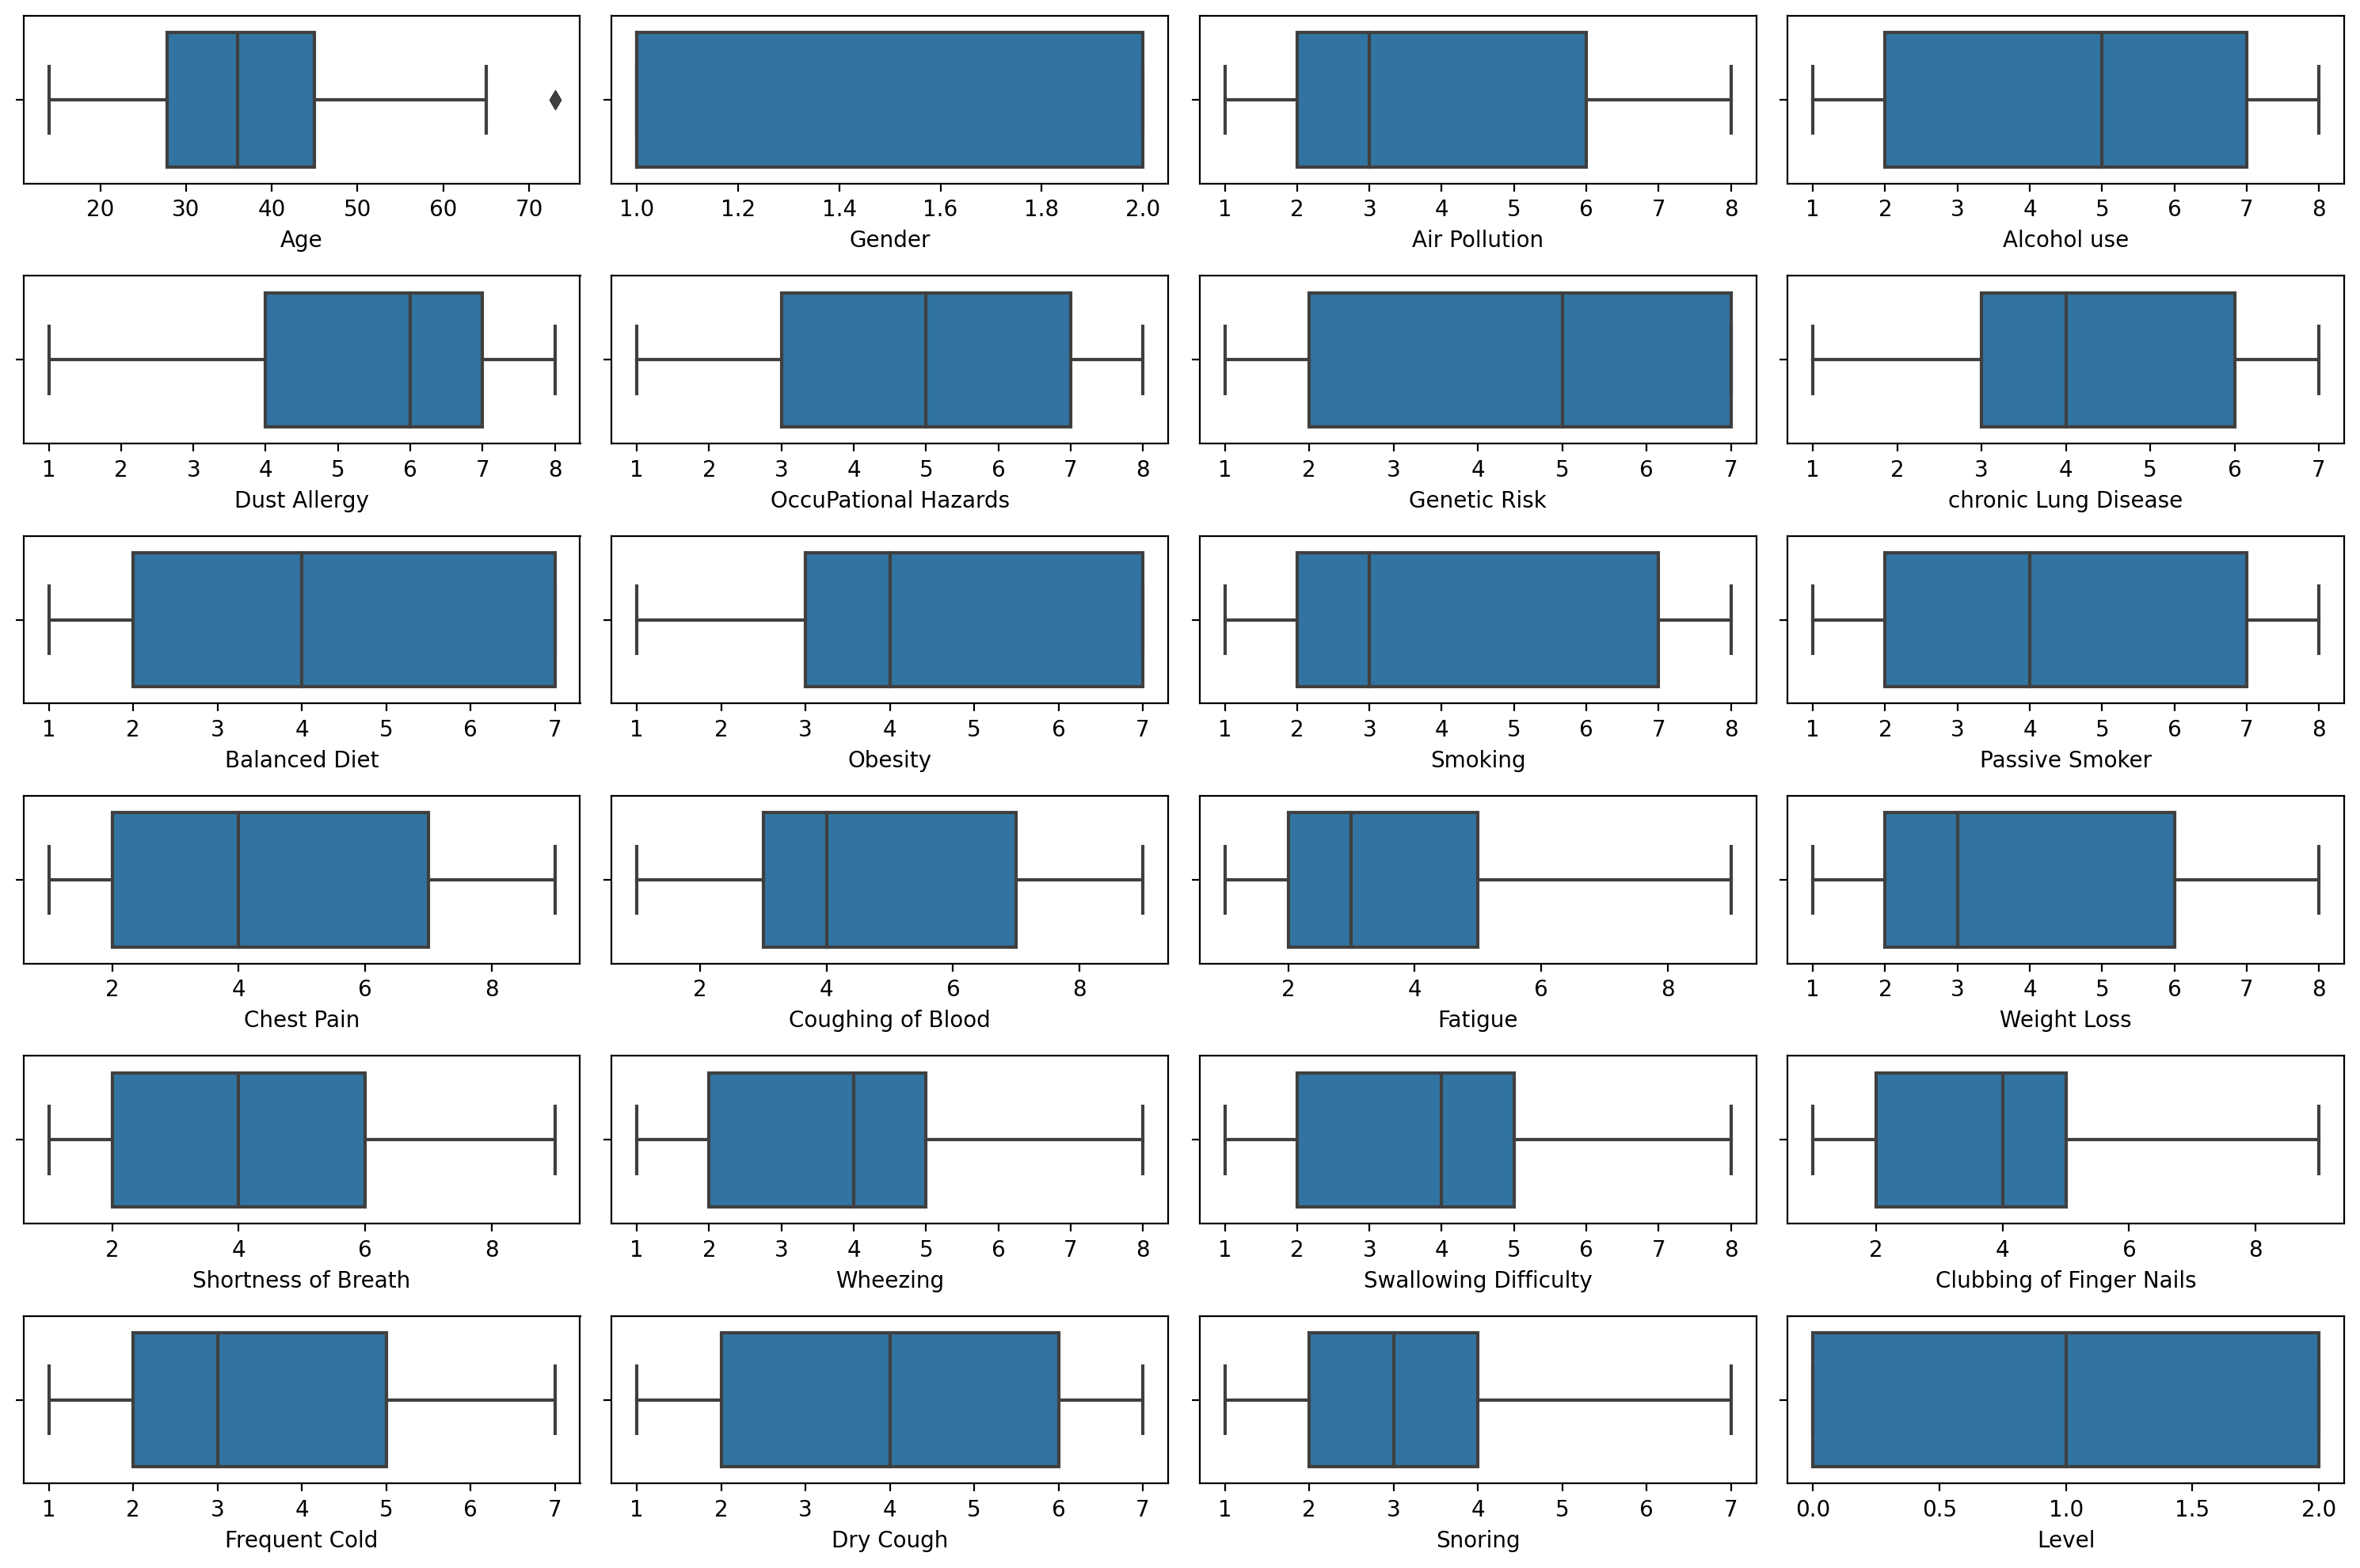

In [8]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(15, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot each boxplot on a subplot
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])

# Remove the empty subplot if necessary
if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Setting Target

In [9]:
# Setting Target

X = df.drop("Level" , axis = 1)
y = df["Level"]

### checking  the distribution of Target variable

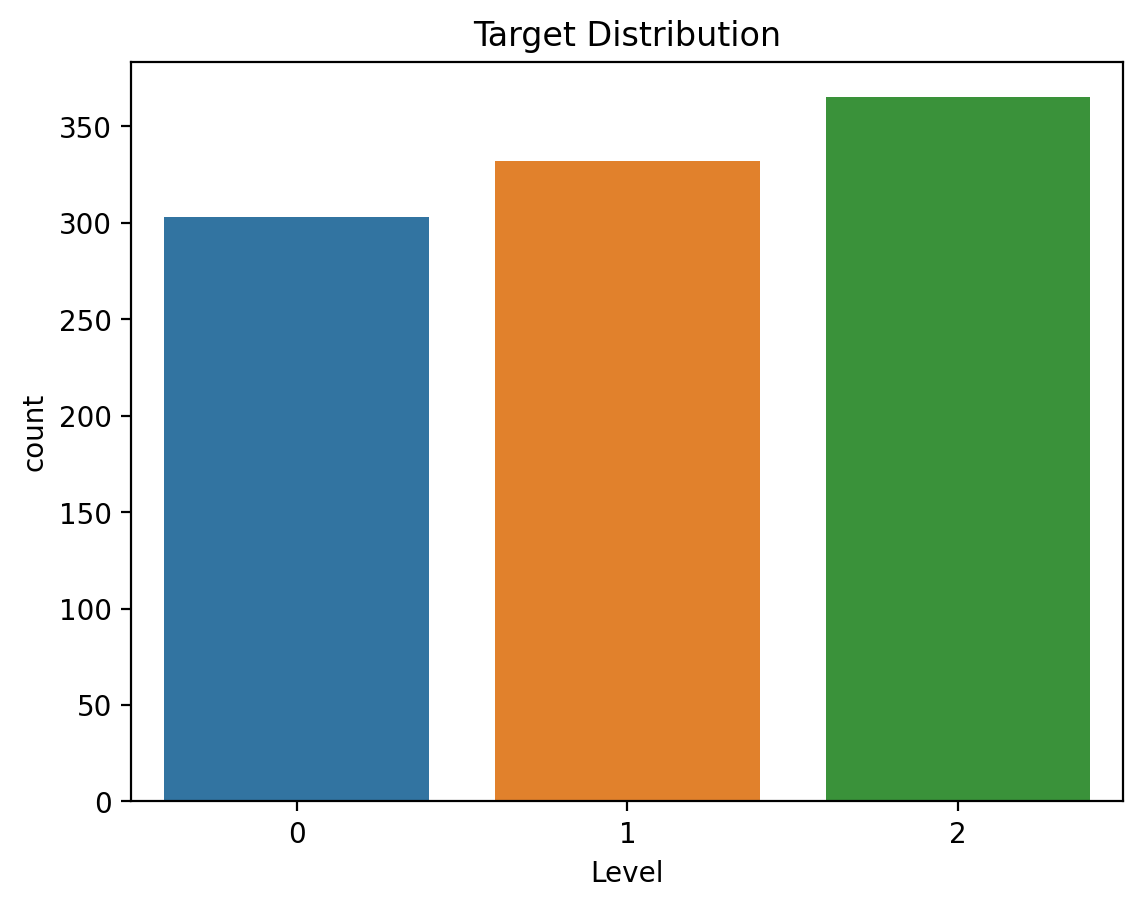

In [10]:
#Let's check the distributaion of Target variable.
sns.countplot(x='Level', data=df,)
plt.title('Target Distribution');

### Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..

In [11]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['Level'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='Age'>

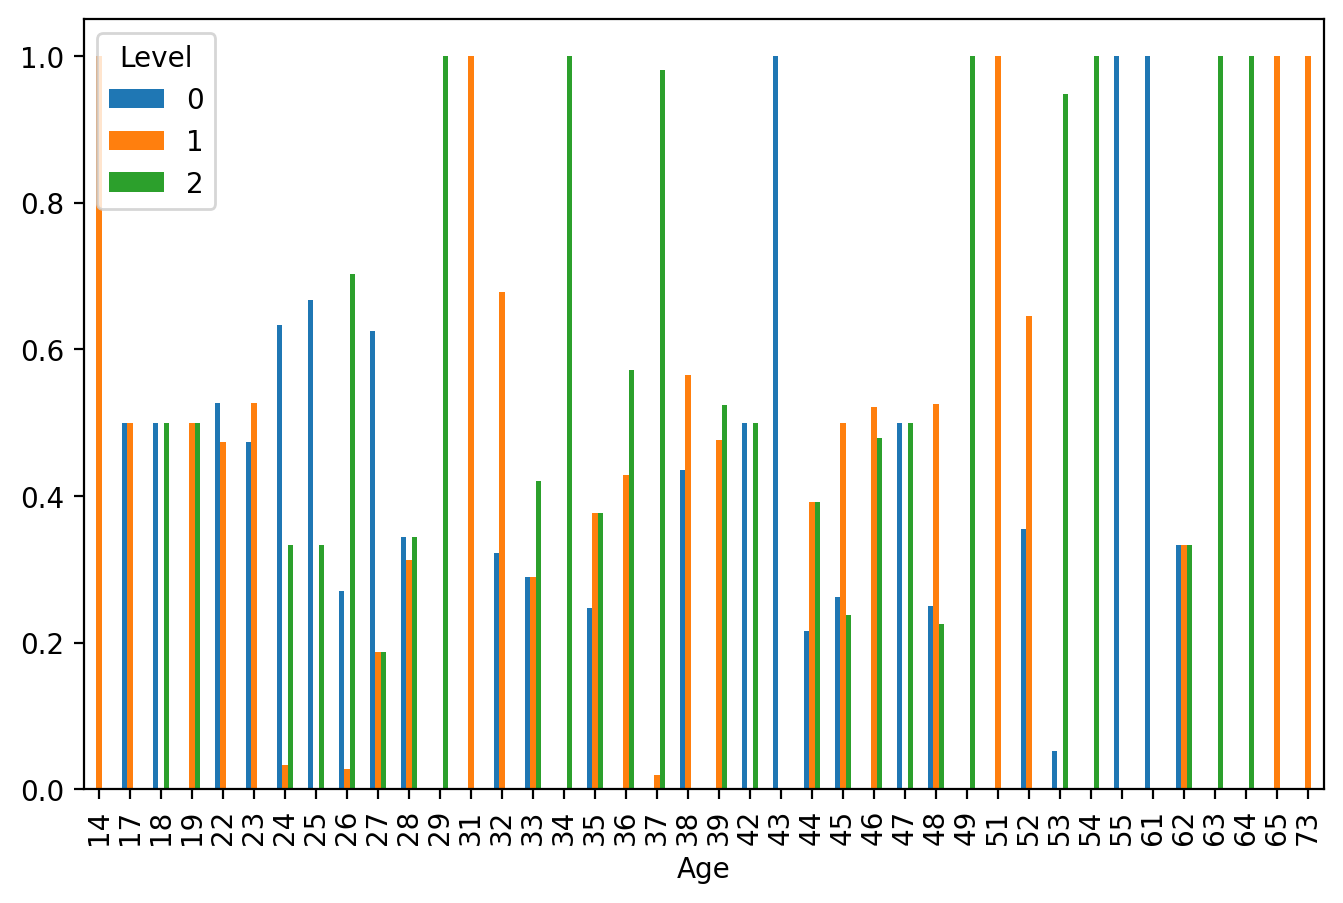

In [12]:
plot('Age')

<Axes: xlabel='Gender'>

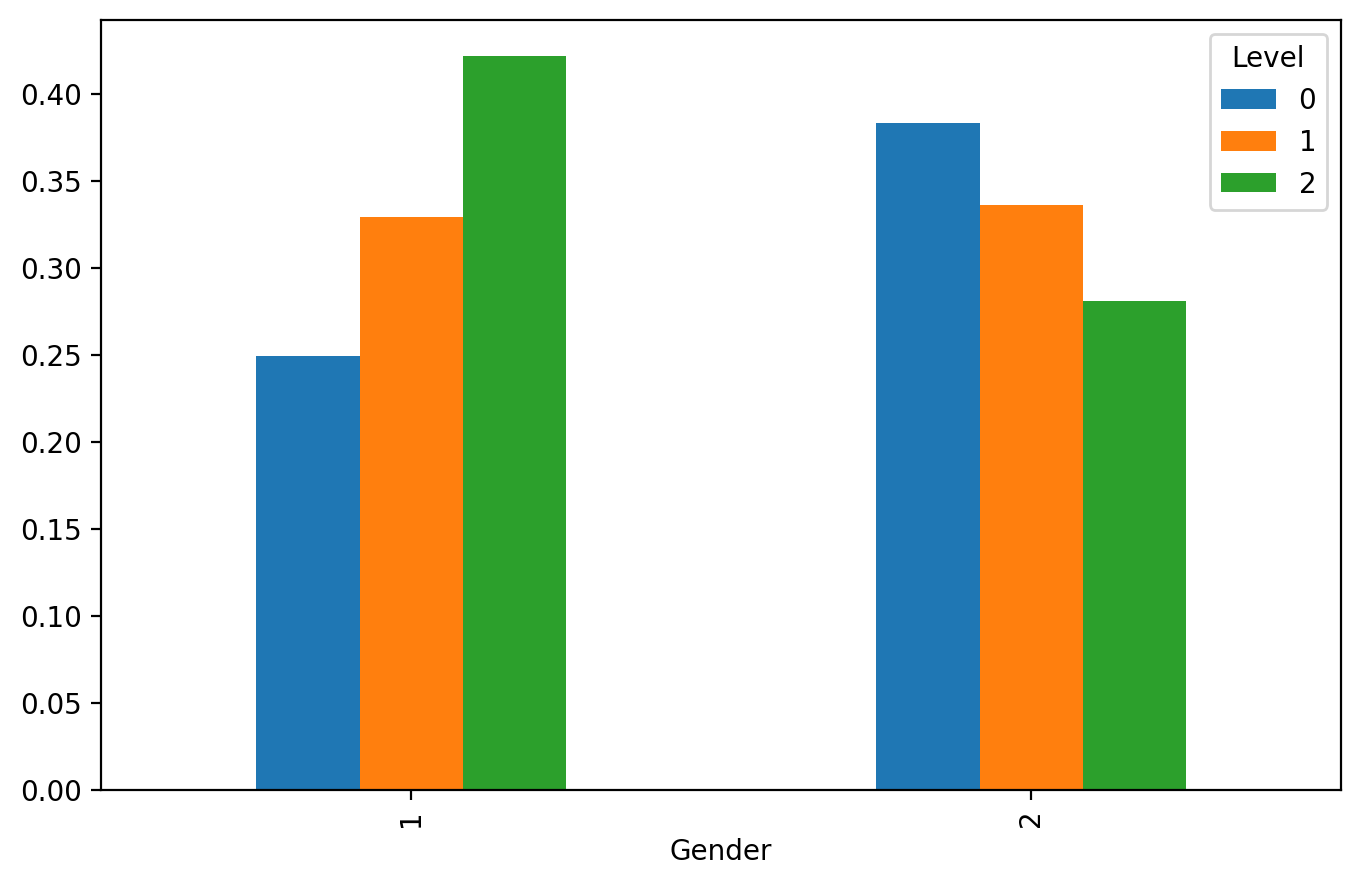

In [13]:
plot('Gender')

<Axes: xlabel='Air Pollution'>

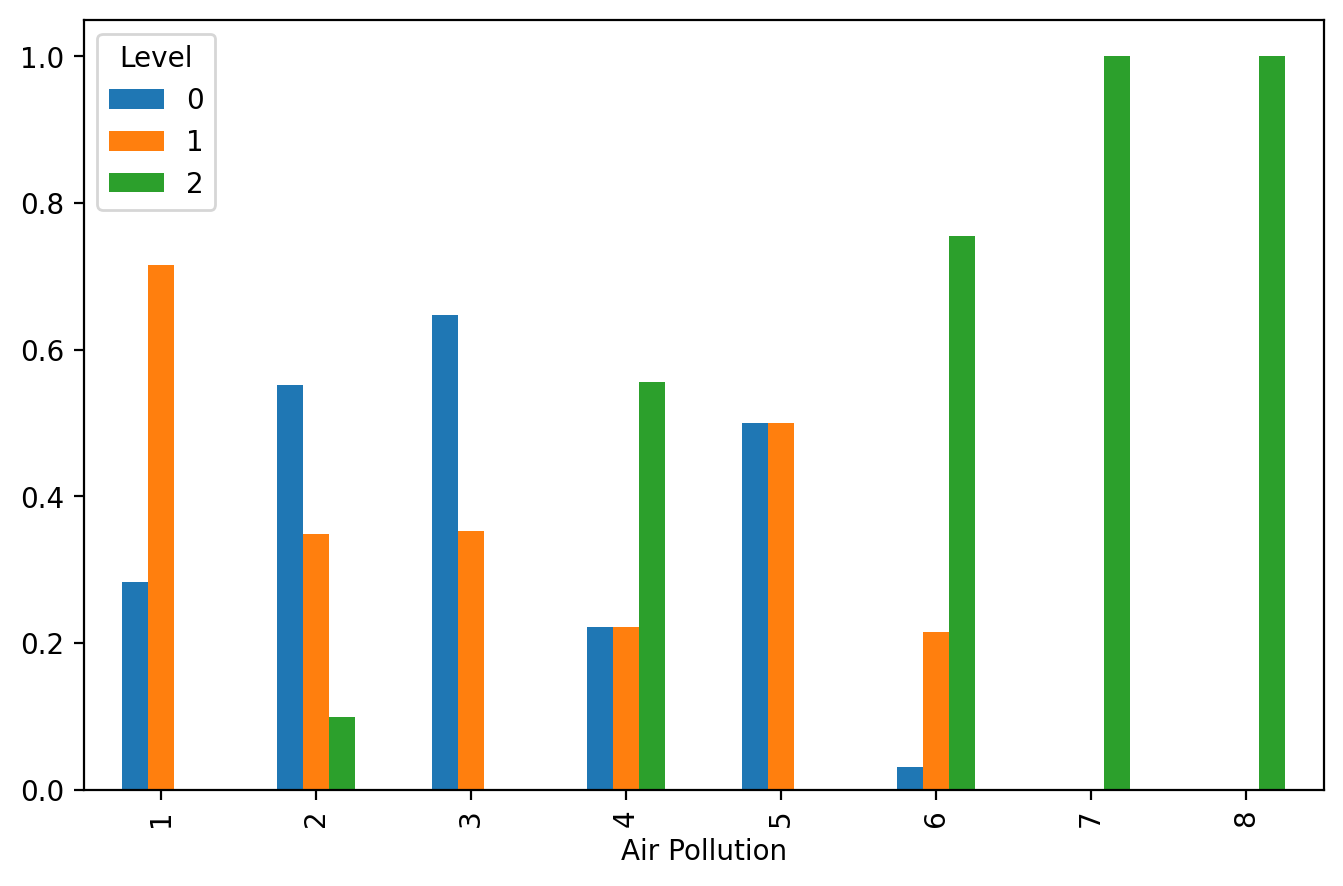

In [14]:
plot('Air Pollution')

<Axes: xlabel='Alcohol use'>

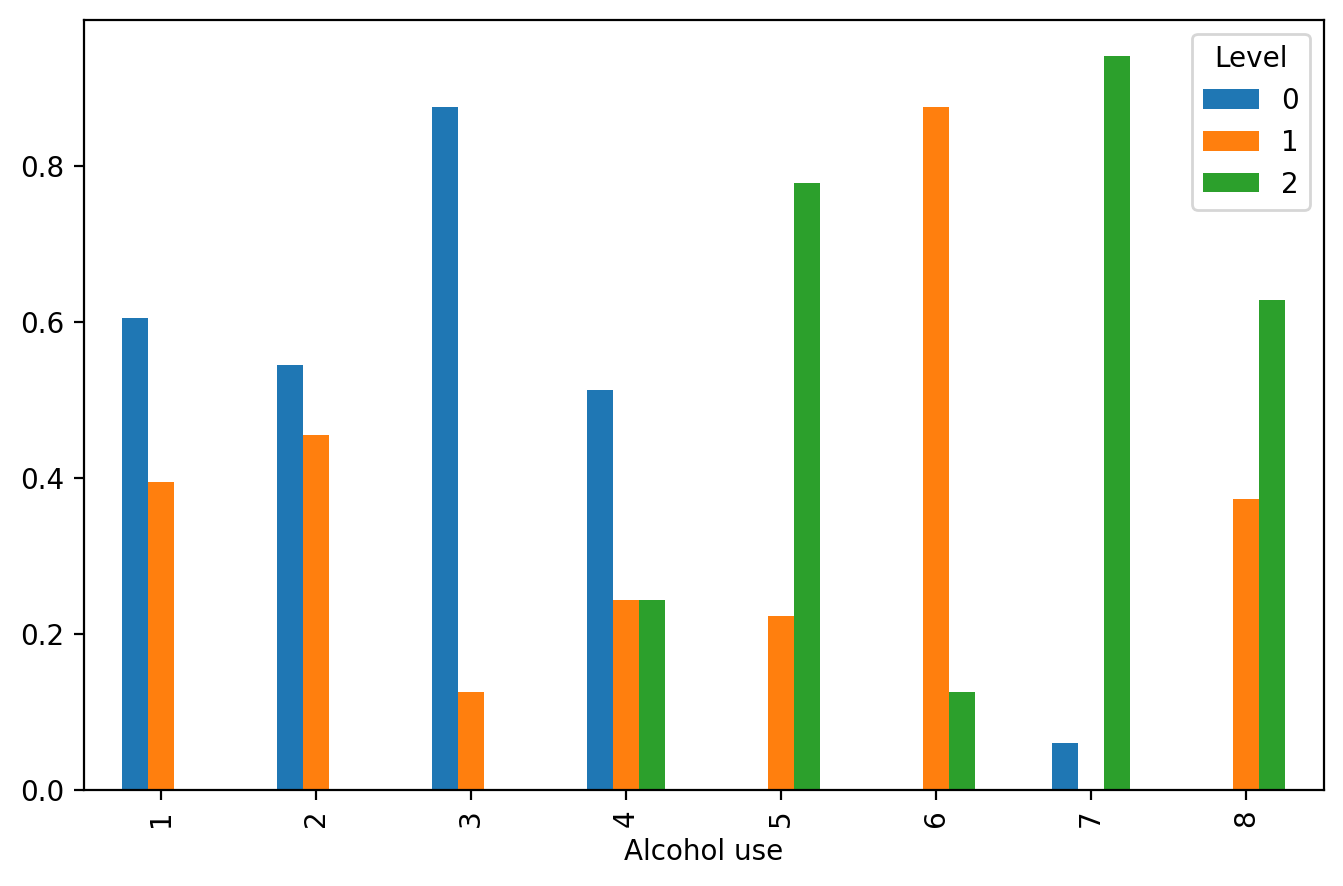

In [15]:
plot('Alcohol use')

<Axes: xlabel='Dust Allergy'>

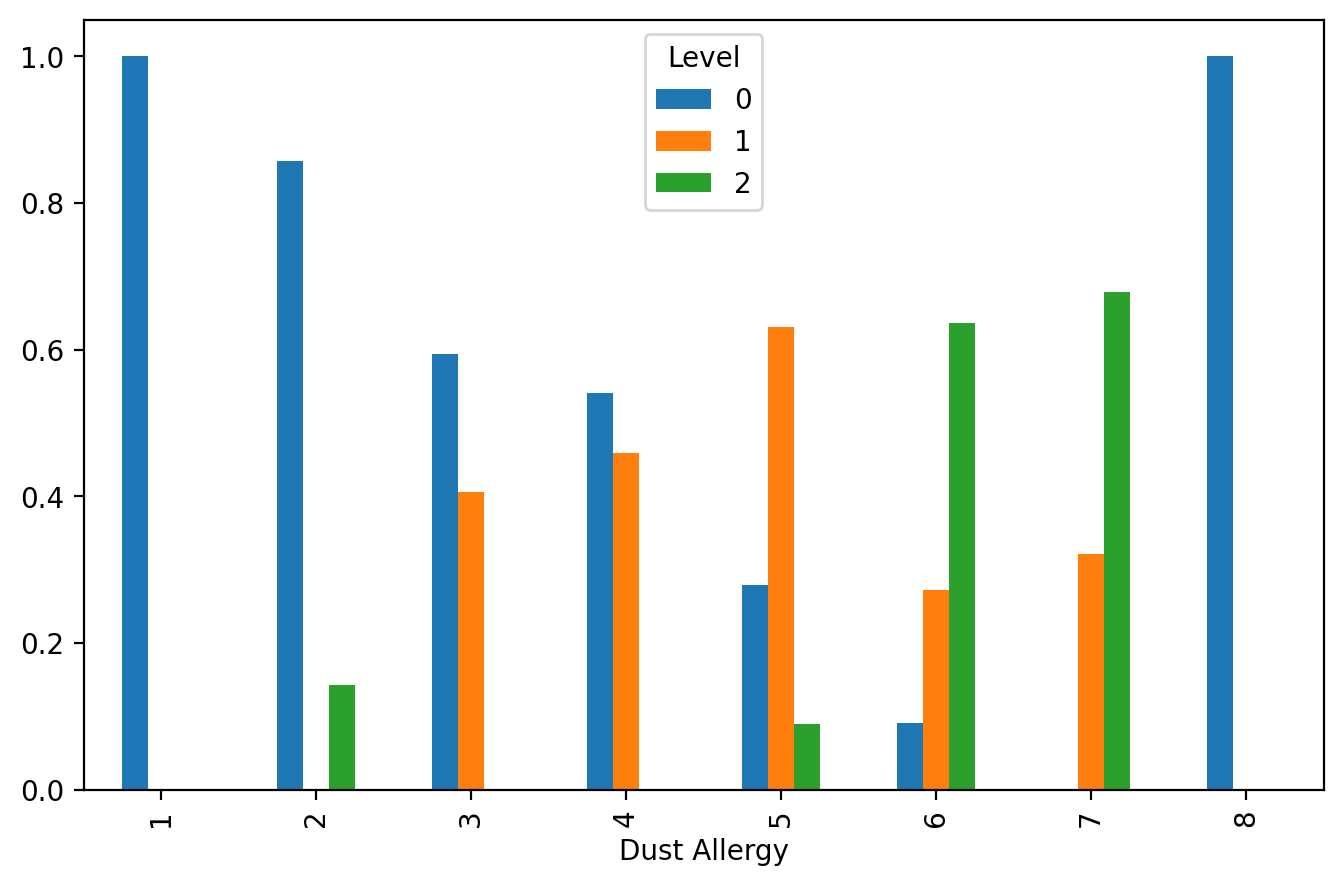

In [16]:
plot('Dust Allergy')

<Axes: xlabel='OccuPational Hazards'>

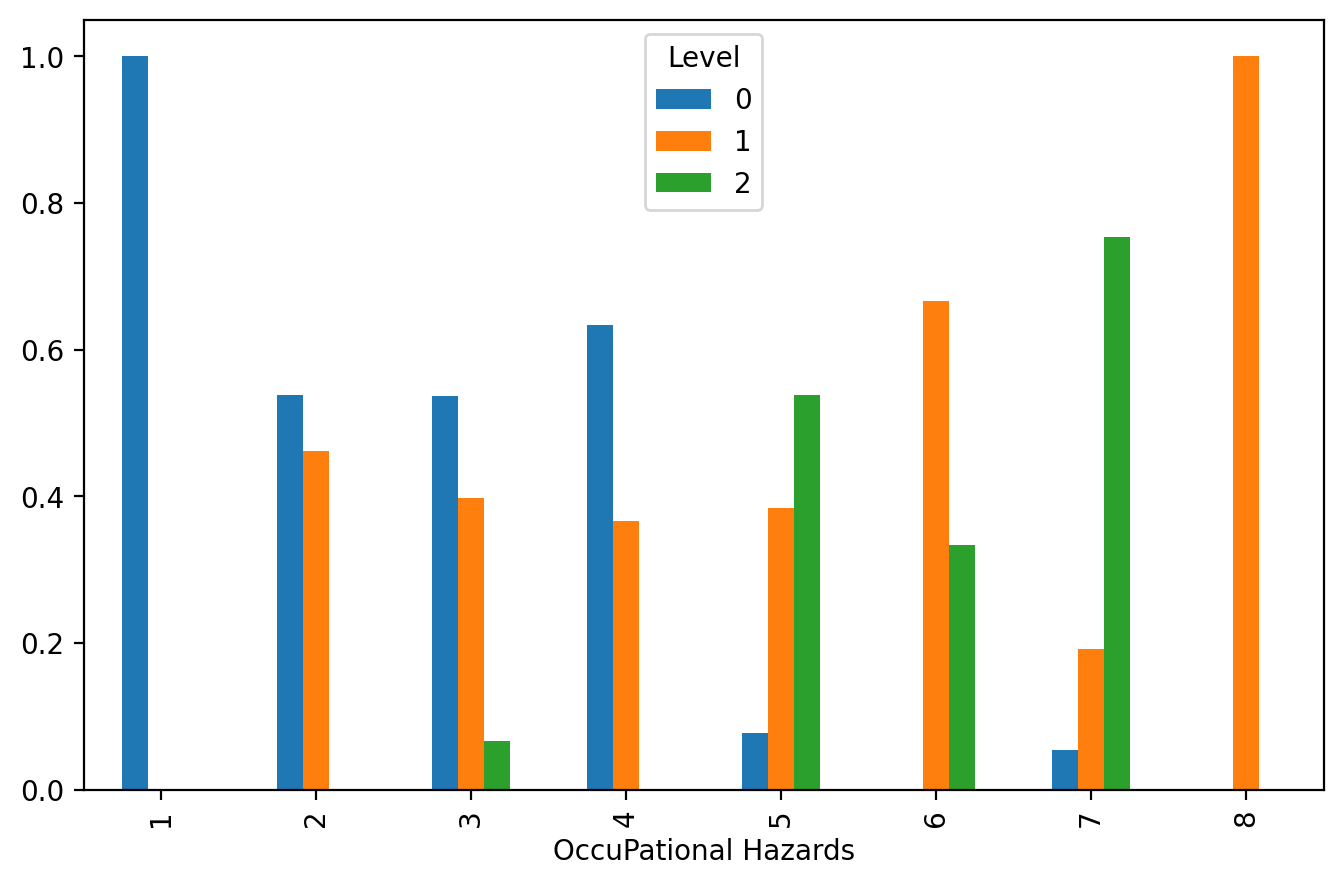

In [17]:
plot('OccuPational Hazards')

<Axes: xlabel='Genetic Risk'>

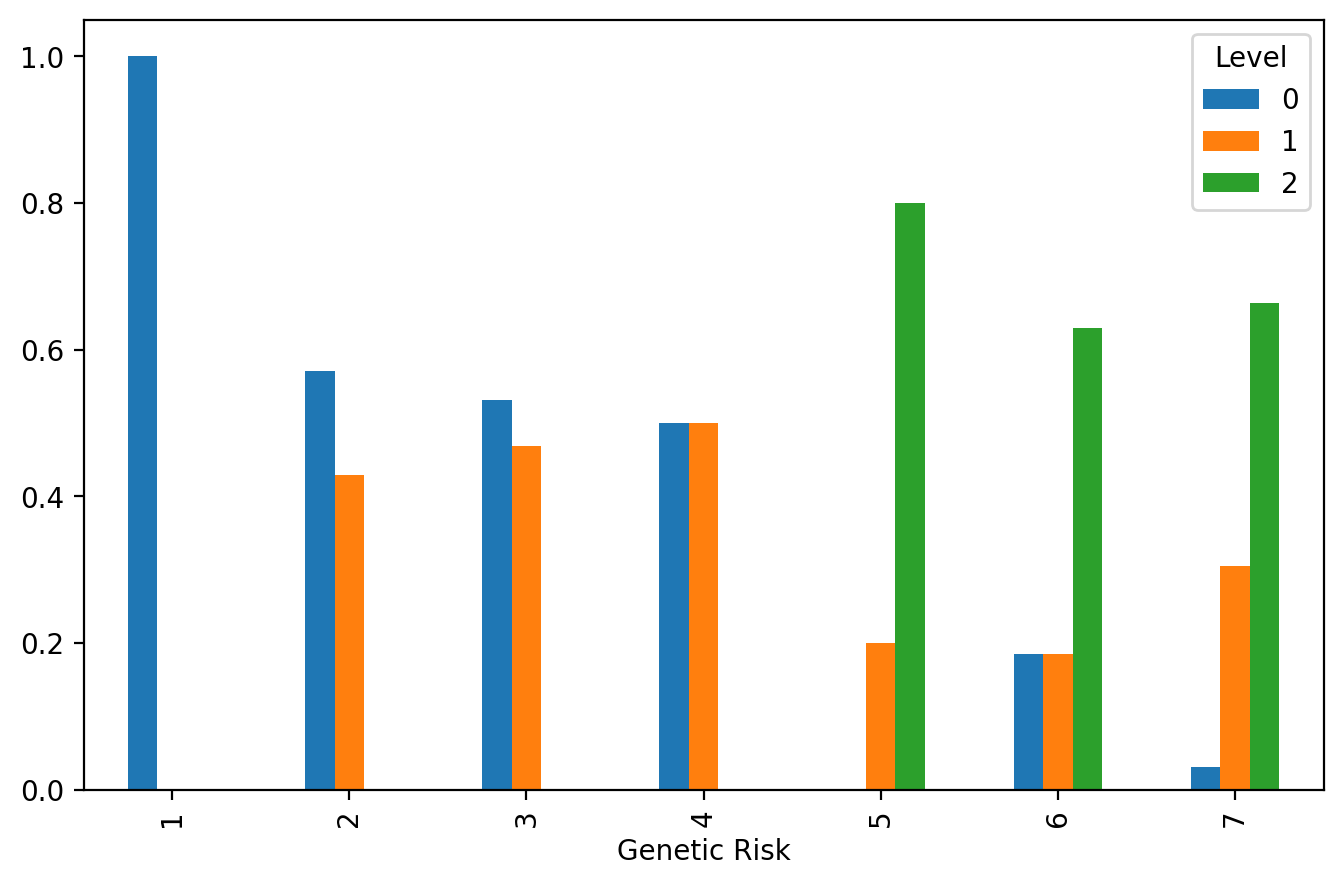

In [18]:
plot('Genetic Risk')

<Axes: xlabel='chronic Lung Disease'>

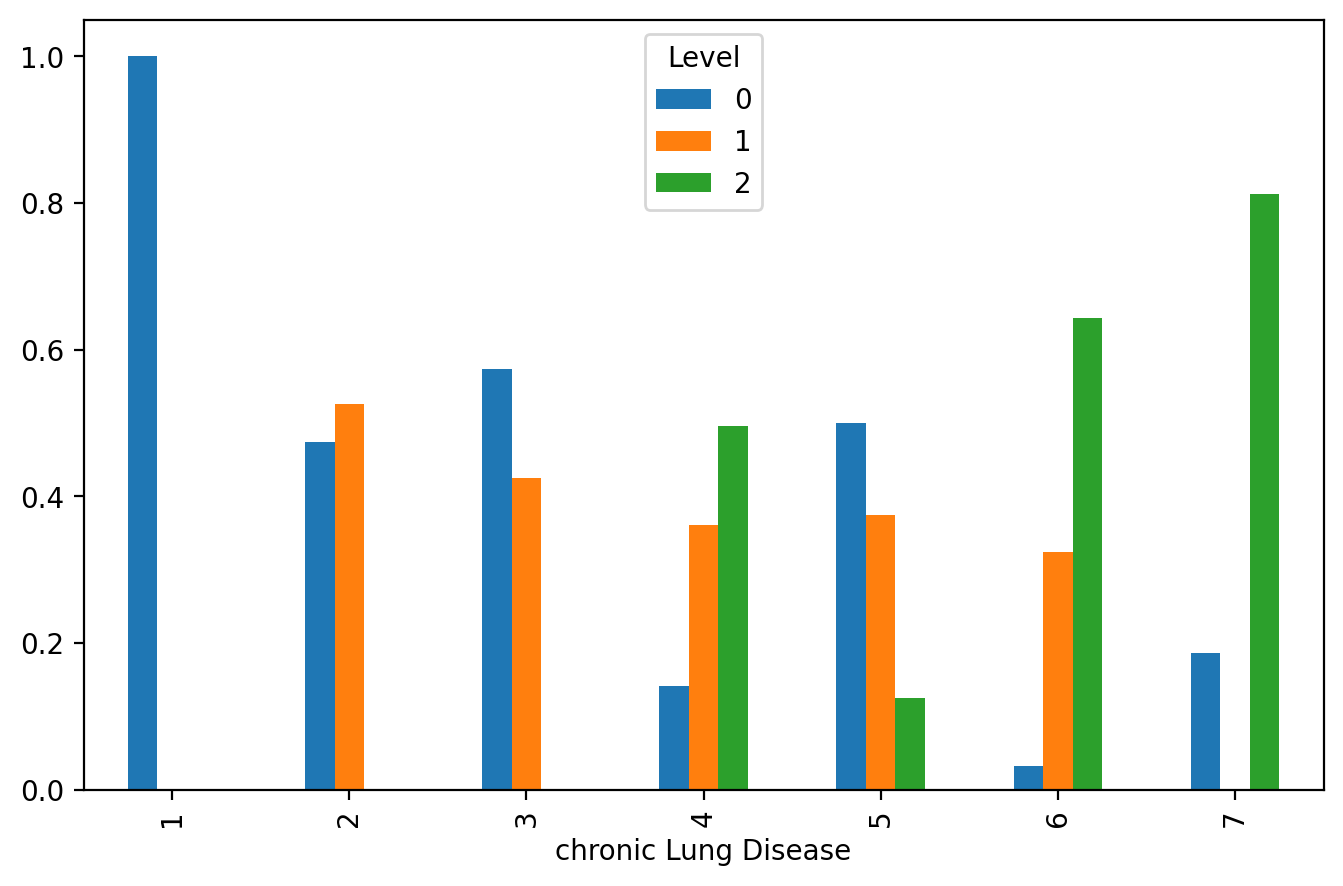

In [19]:
plot('chronic Lung Disease')

<Axes: xlabel='Balanced Diet'>

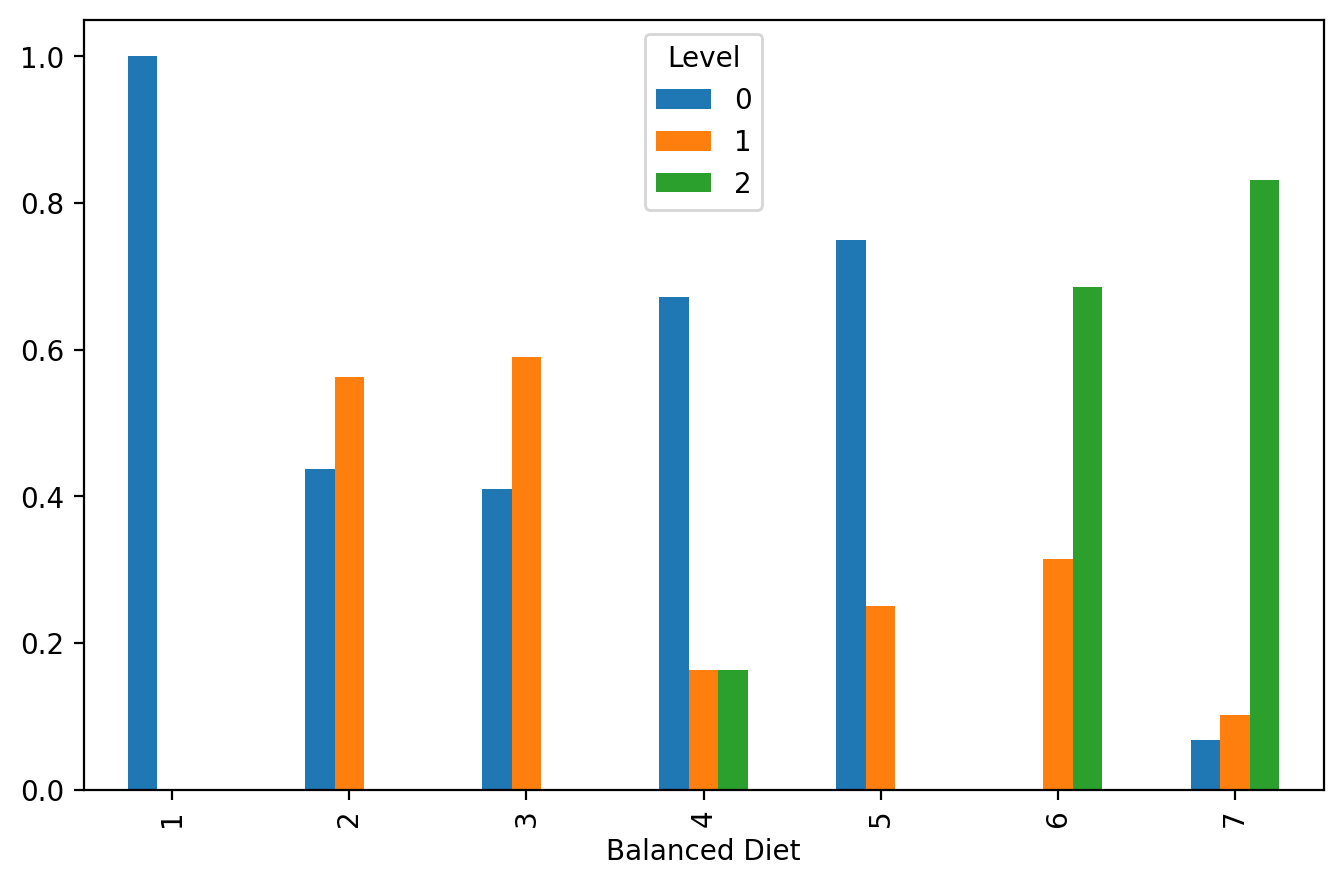

In [20]:
plot('Balanced Diet')

<Axes: xlabel='Obesity'>

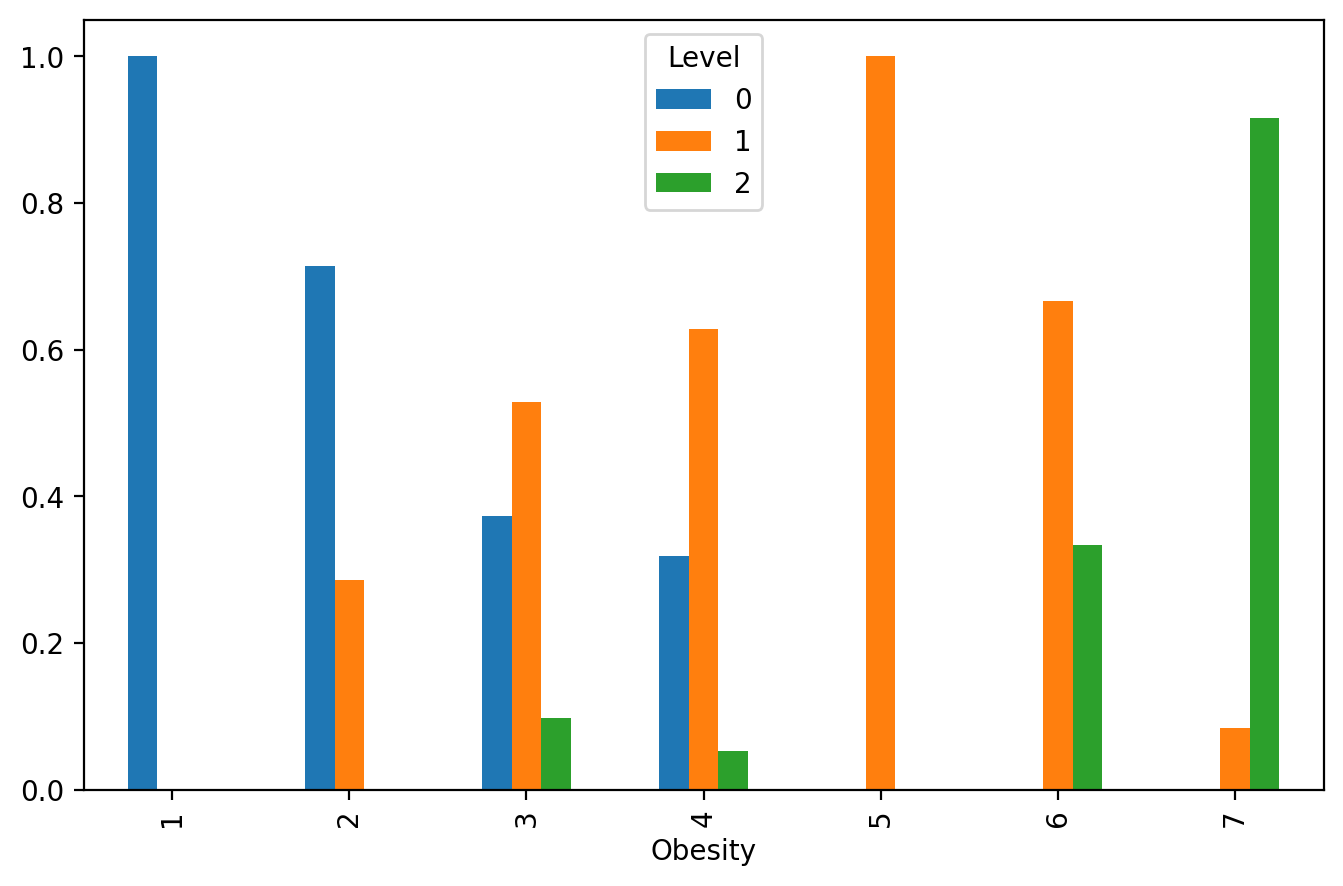

In [21]:
plot('Obesity')

<Axes: xlabel='Smoking'>

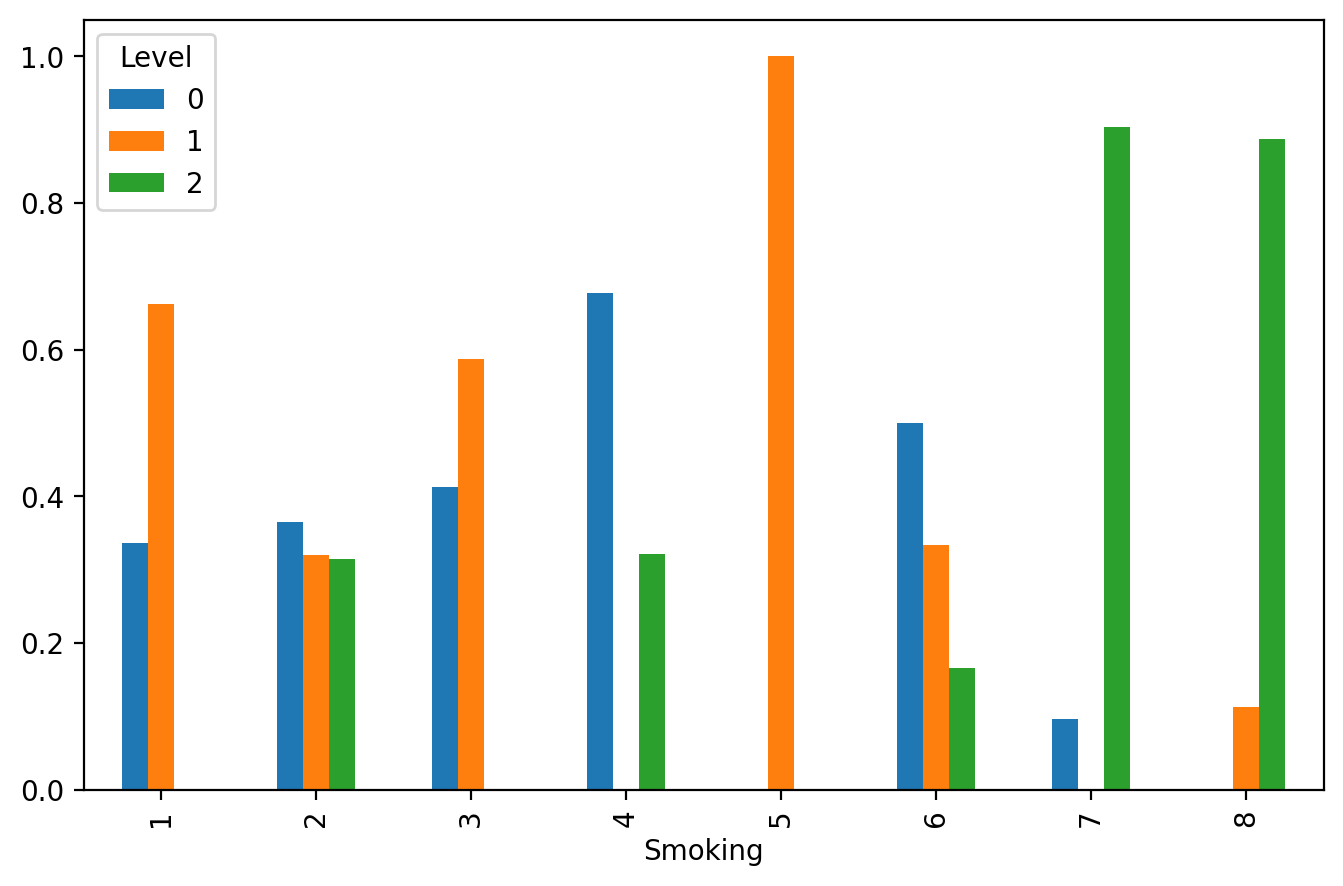

In [22]:
plot('Smoking')

<Axes: xlabel='Passive Smoker'>

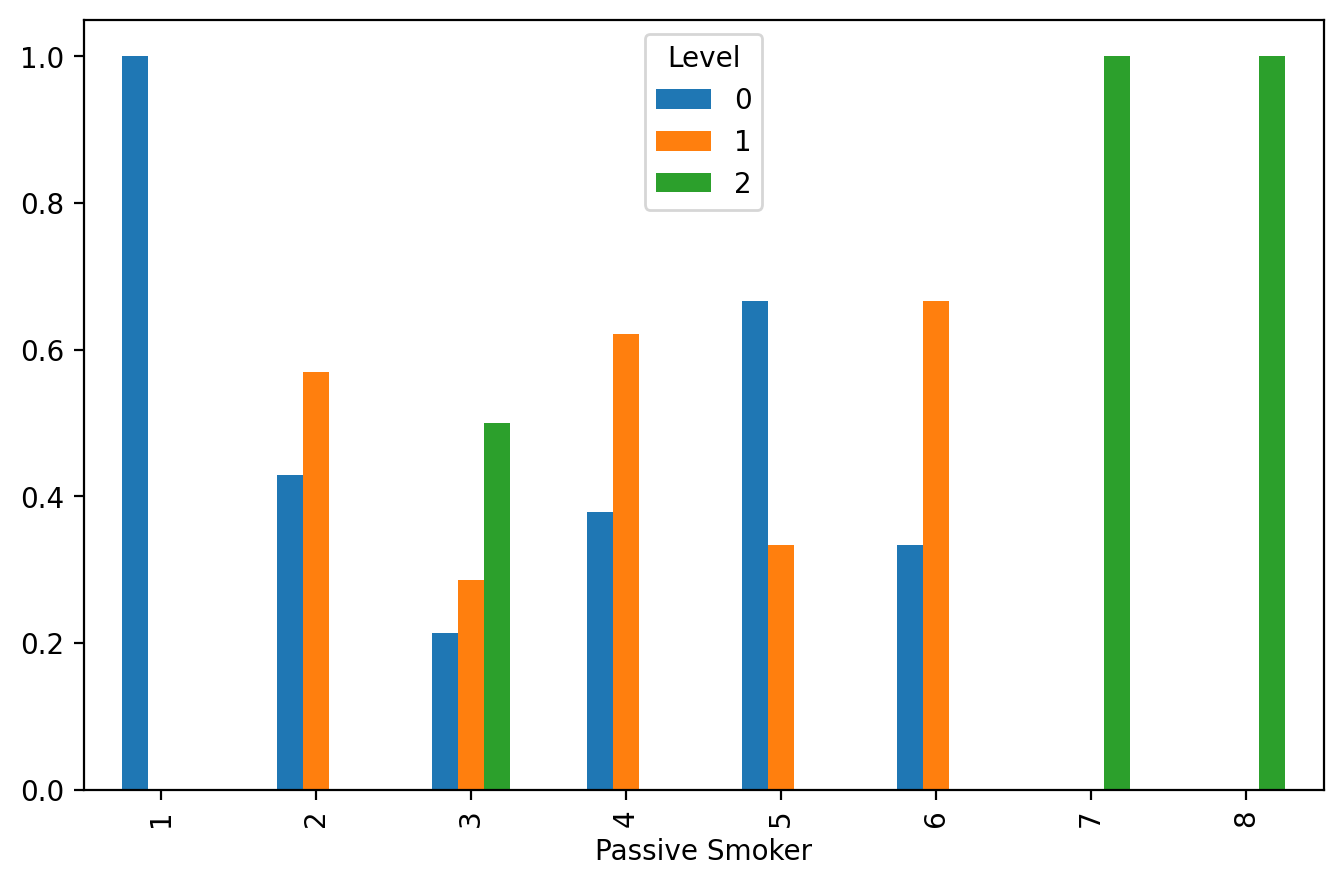

In [23]:
plot('Passive Smoker')

<Axes: xlabel='Chest Pain'>

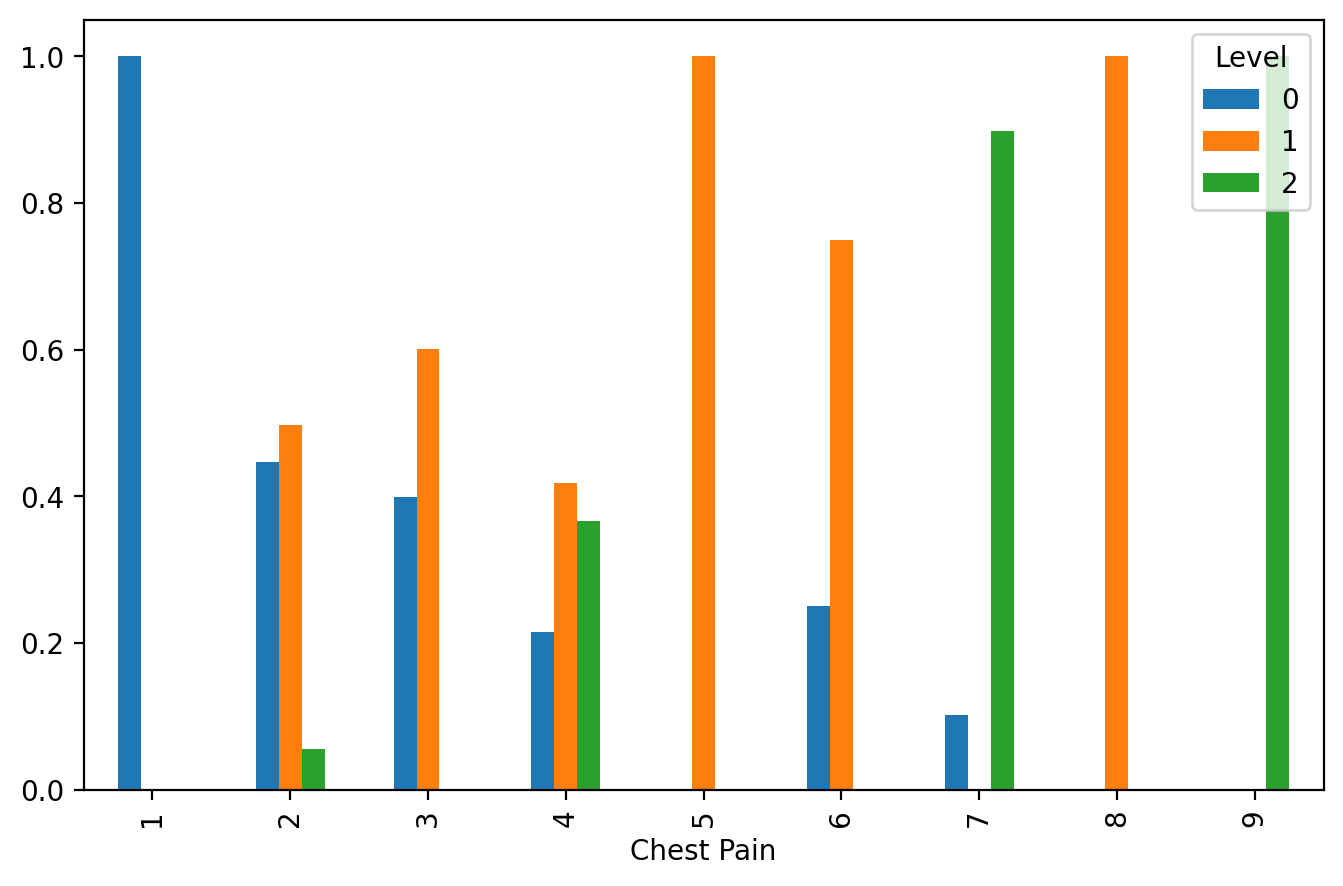

In [24]:
plot('Chest Pain')

<Axes: xlabel='Coughing of Blood'>

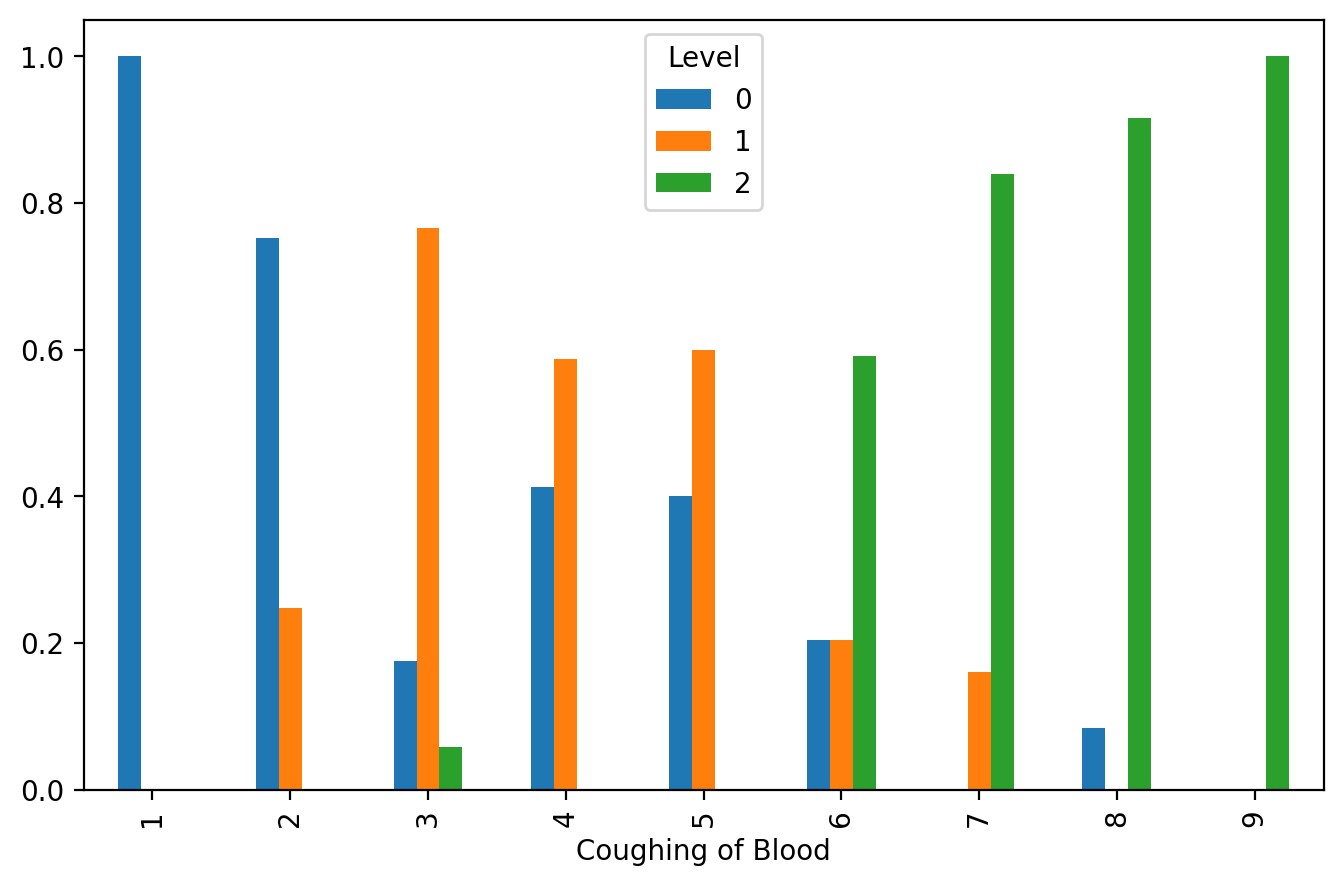

In [25]:
plot('Coughing of Blood')

<Axes: xlabel='Fatigue'>

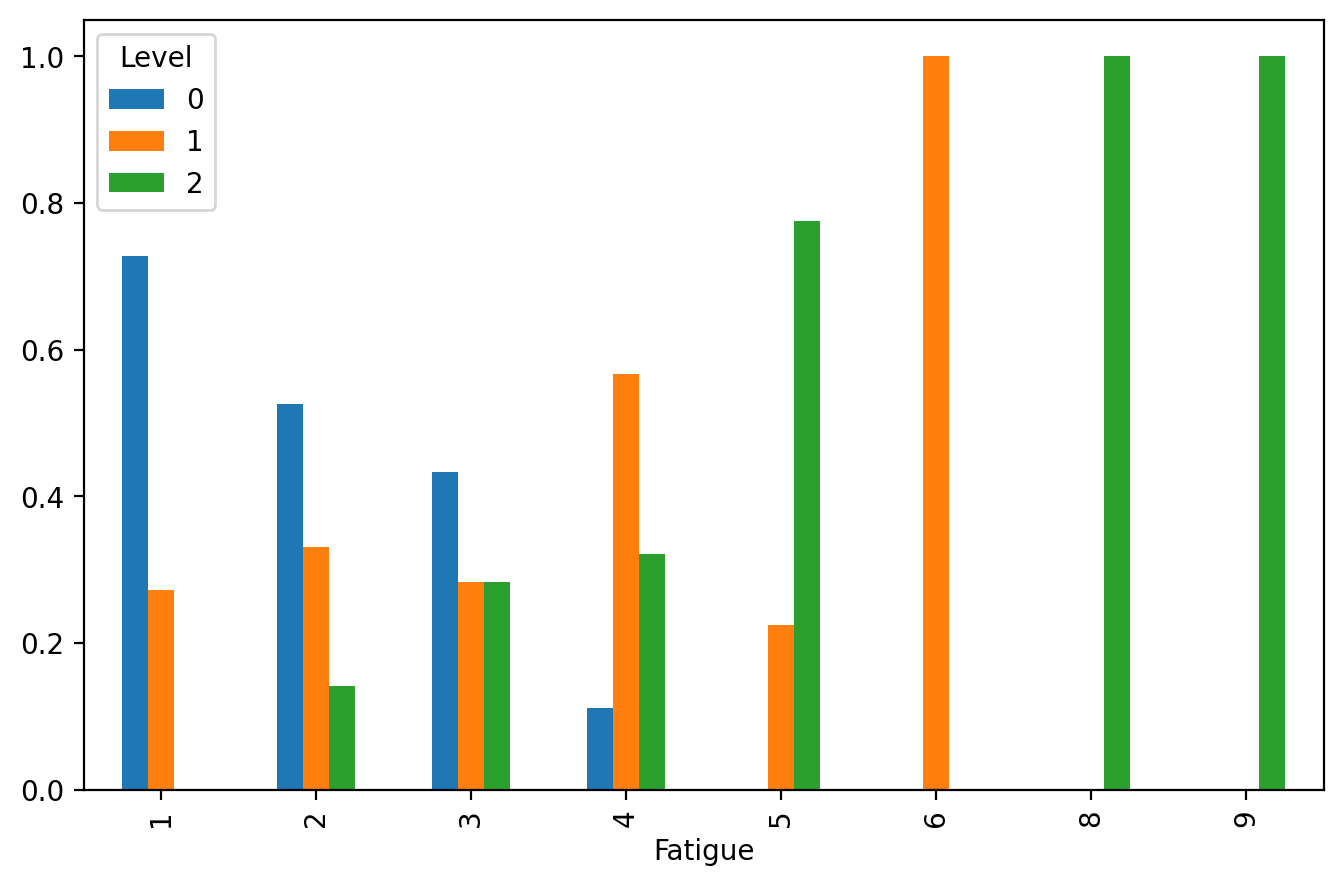

In [26]:
plot('Fatigue')

<Axes: xlabel='Weight Loss'>

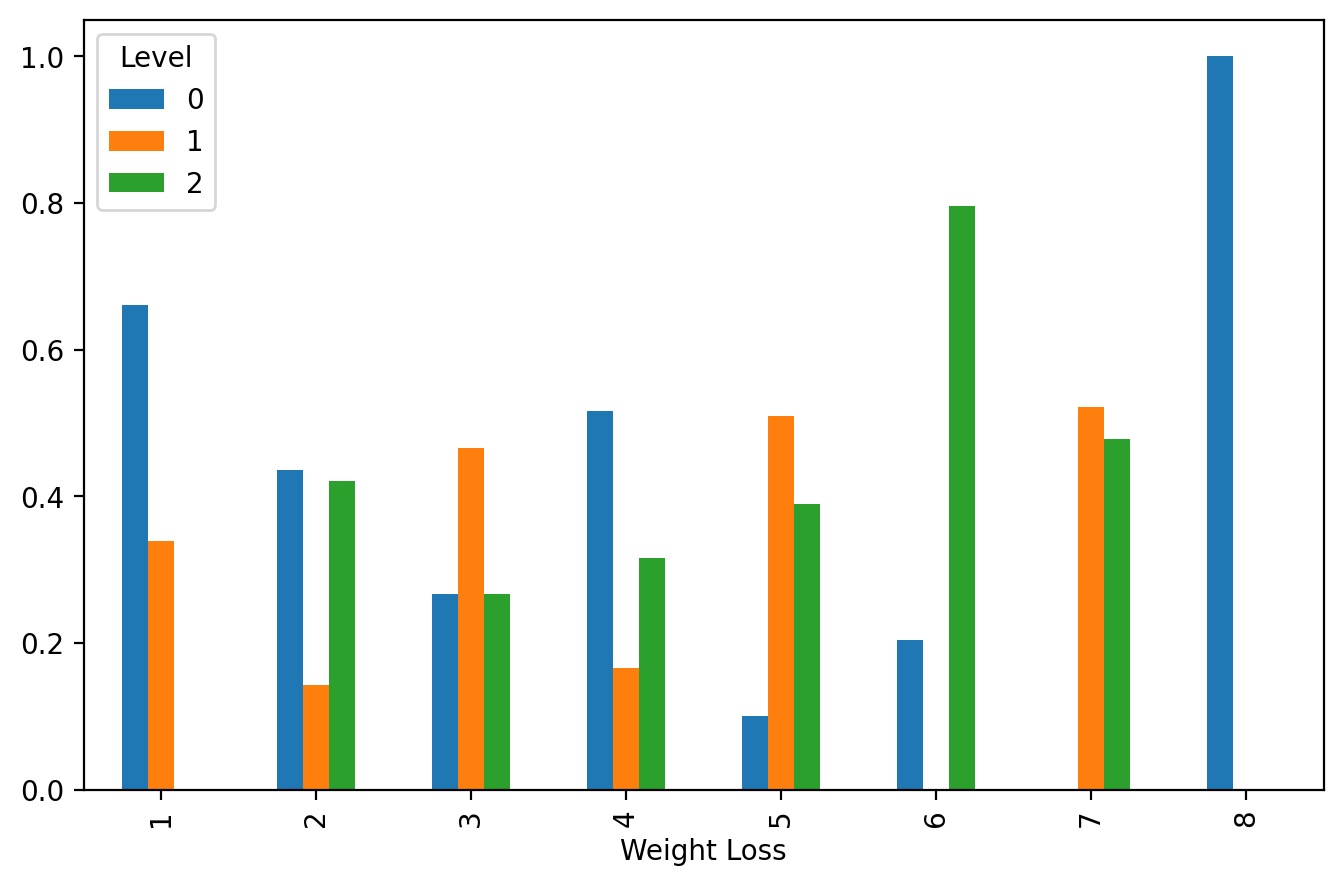

In [27]:
plot('Weight Loss')

<Axes: xlabel='Shortness of Breath'>

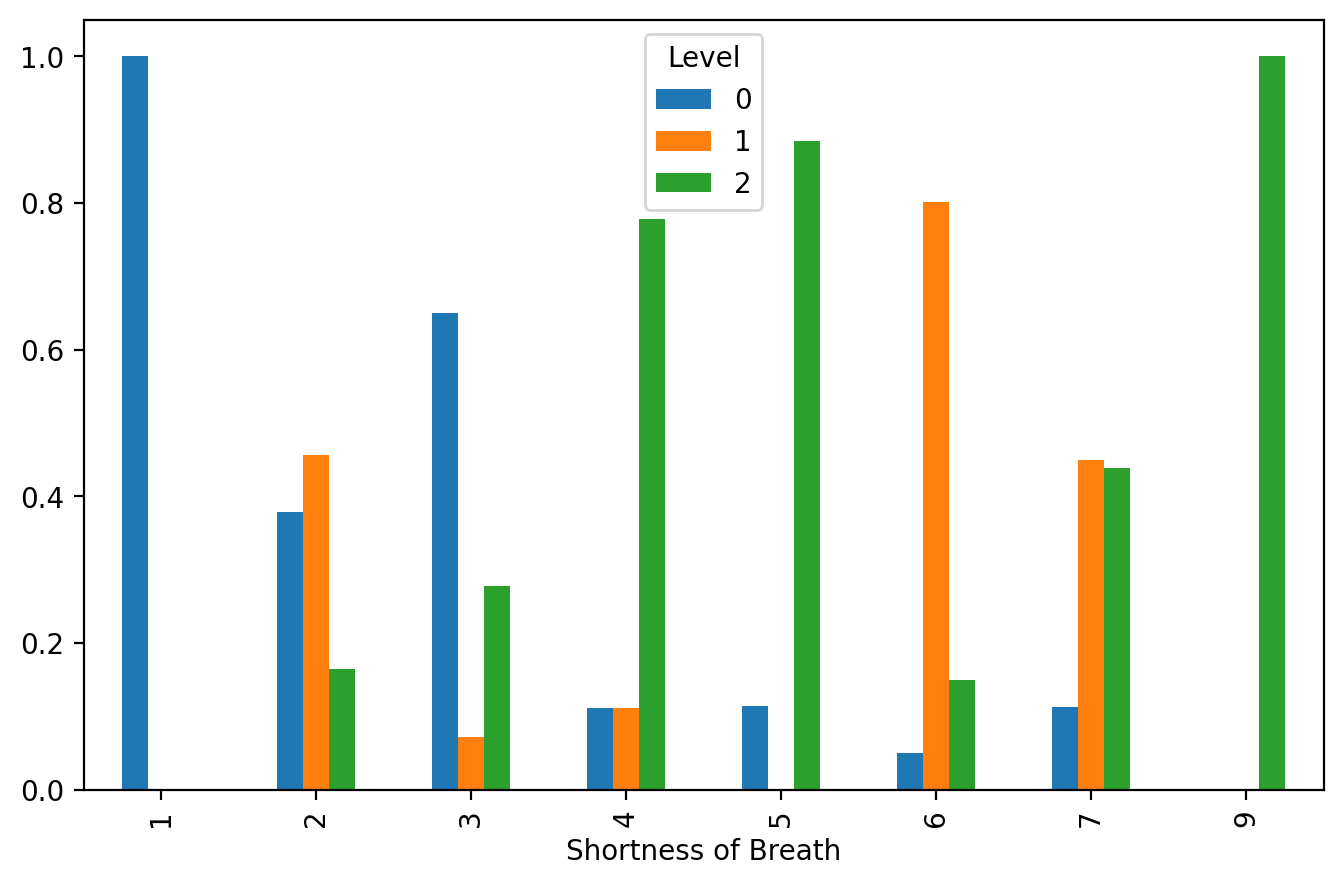

In [28]:
plot('Shortness of Breath')

<Axes: xlabel='Wheezing'>

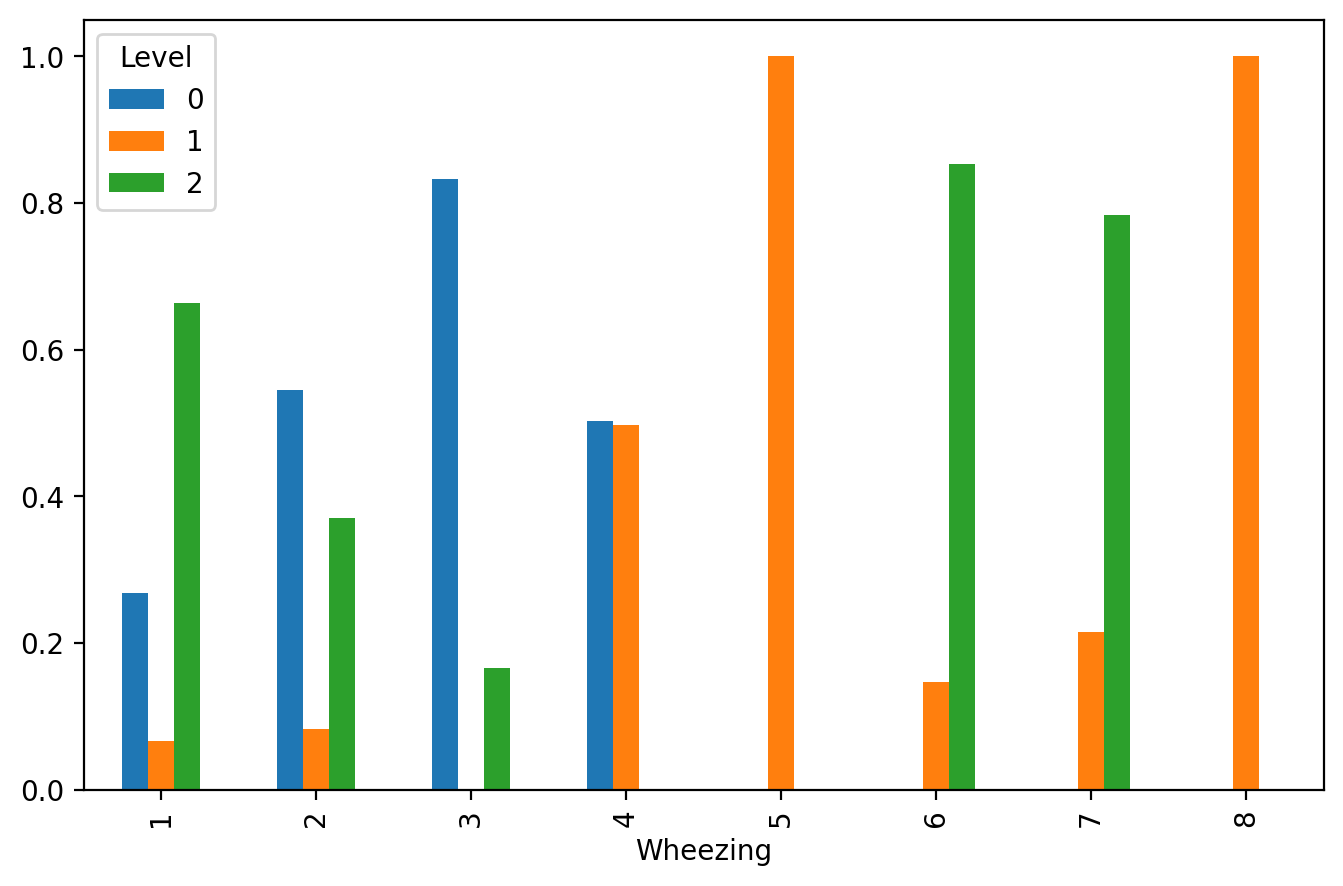

In [29]:
plot('Wheezing')

<Axes: xlabel='Swallowing Difficulty'>

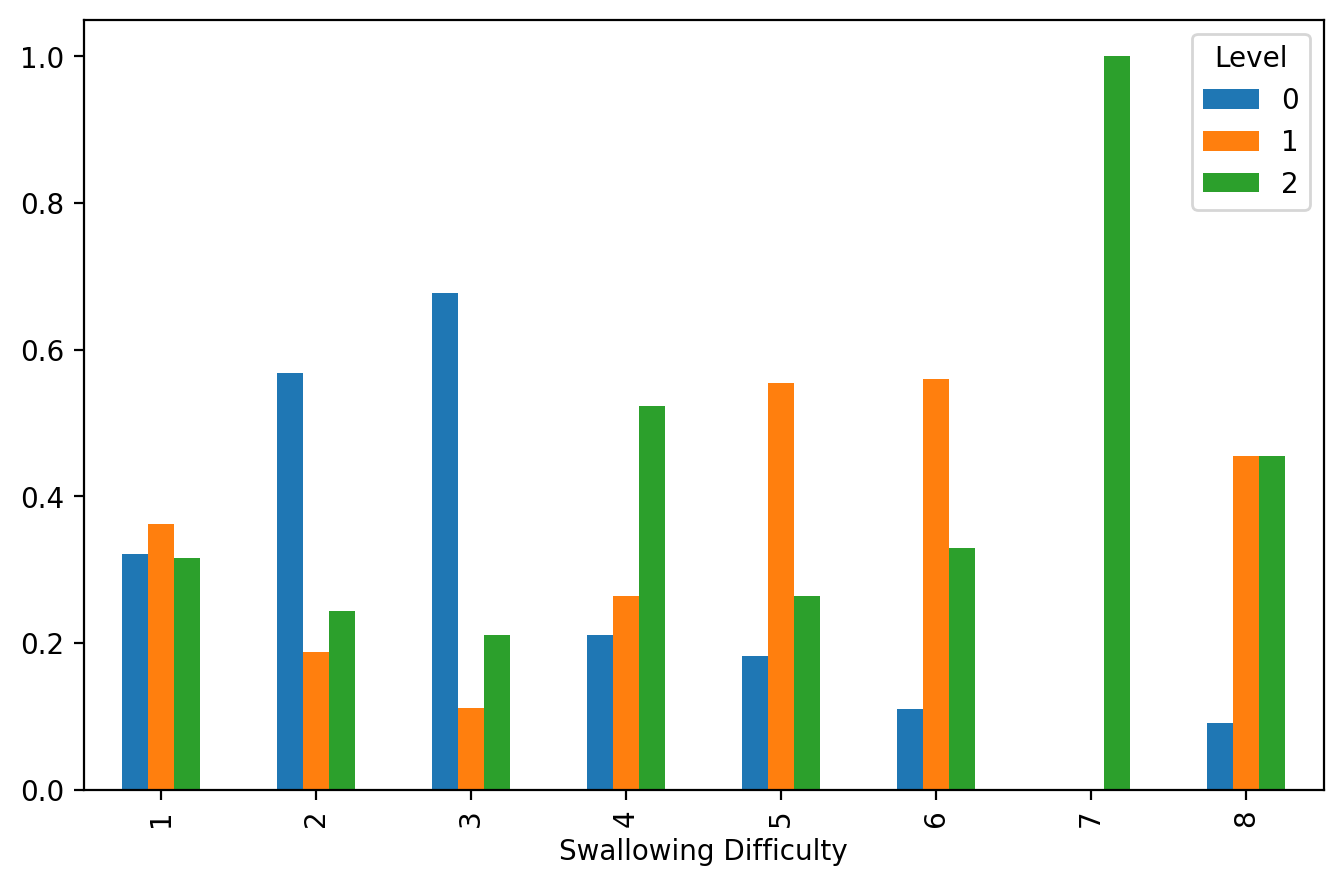

In [30]:
plot('Swallowing Difficulty')

<Axes: xlabel='Clubbing of Finger Nails'>

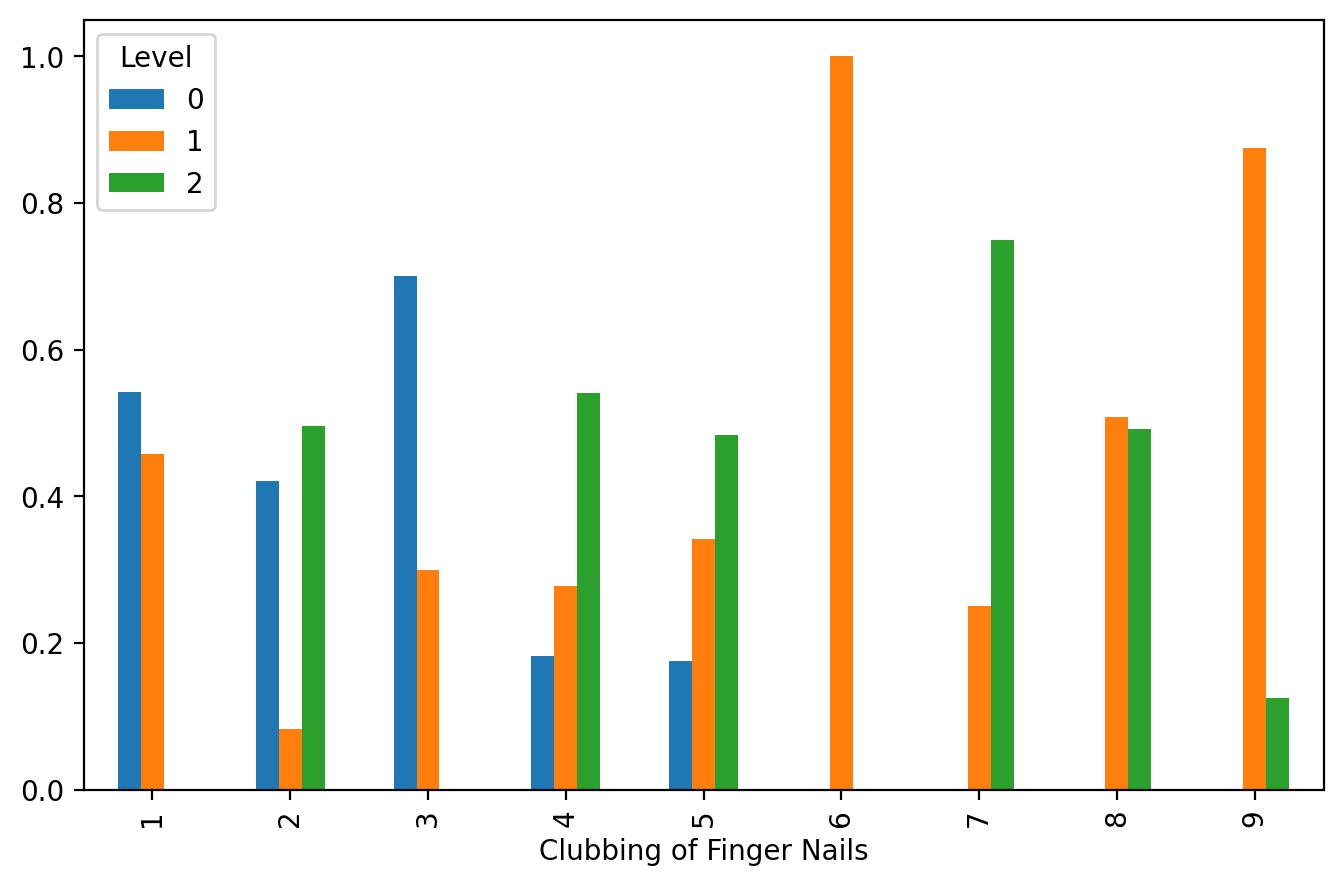

In [31]:
plot('Clubbing of Finger Nails')

<Axes: xlabel='Frequent Cold'>

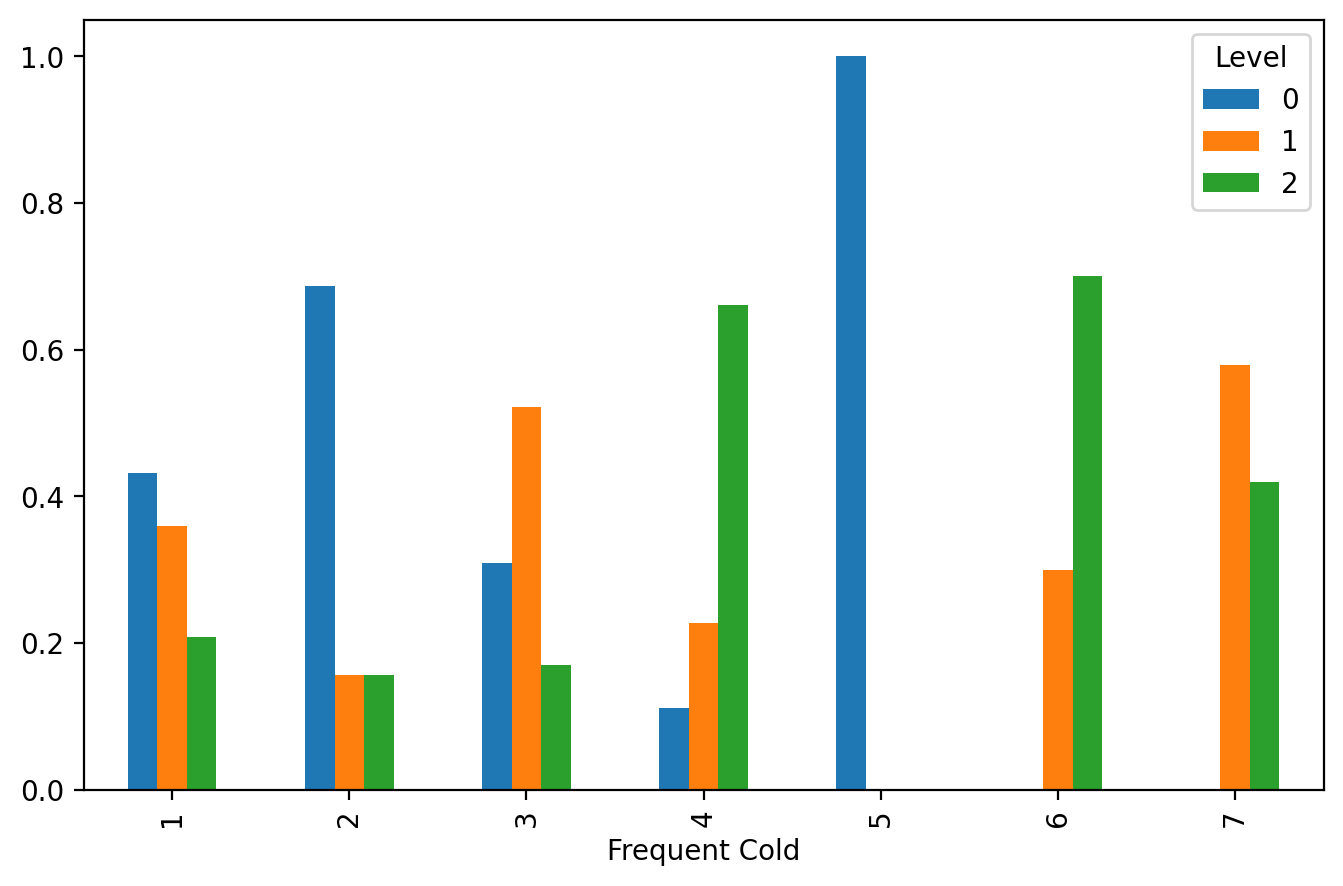

In [32]:
plot('Frequent Cold')

<Axes: xlabel='Dry Cough'>

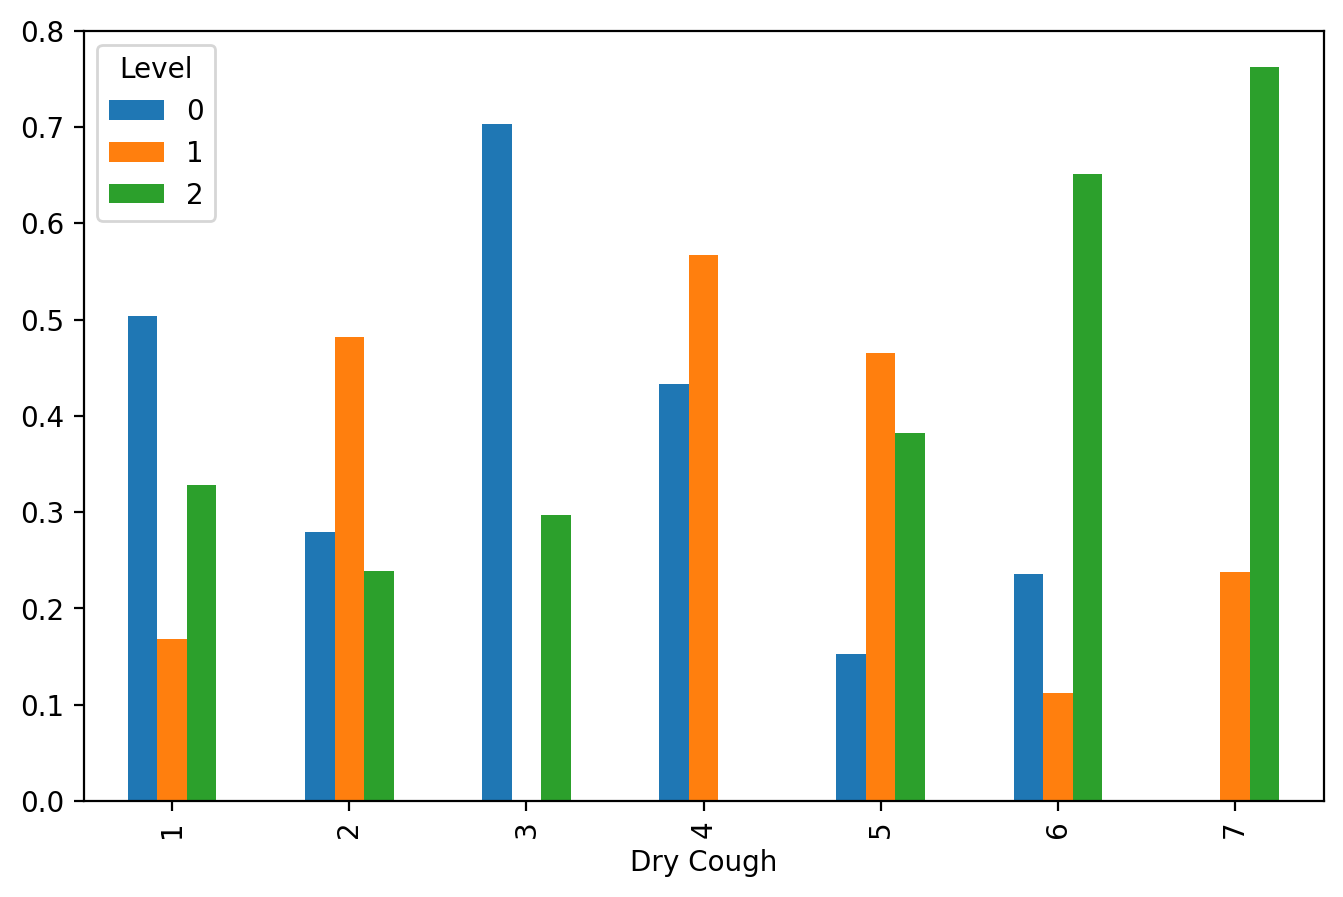

In [33]:
plot('Dry Cough')

<Axes: xlabel='Snoring'>

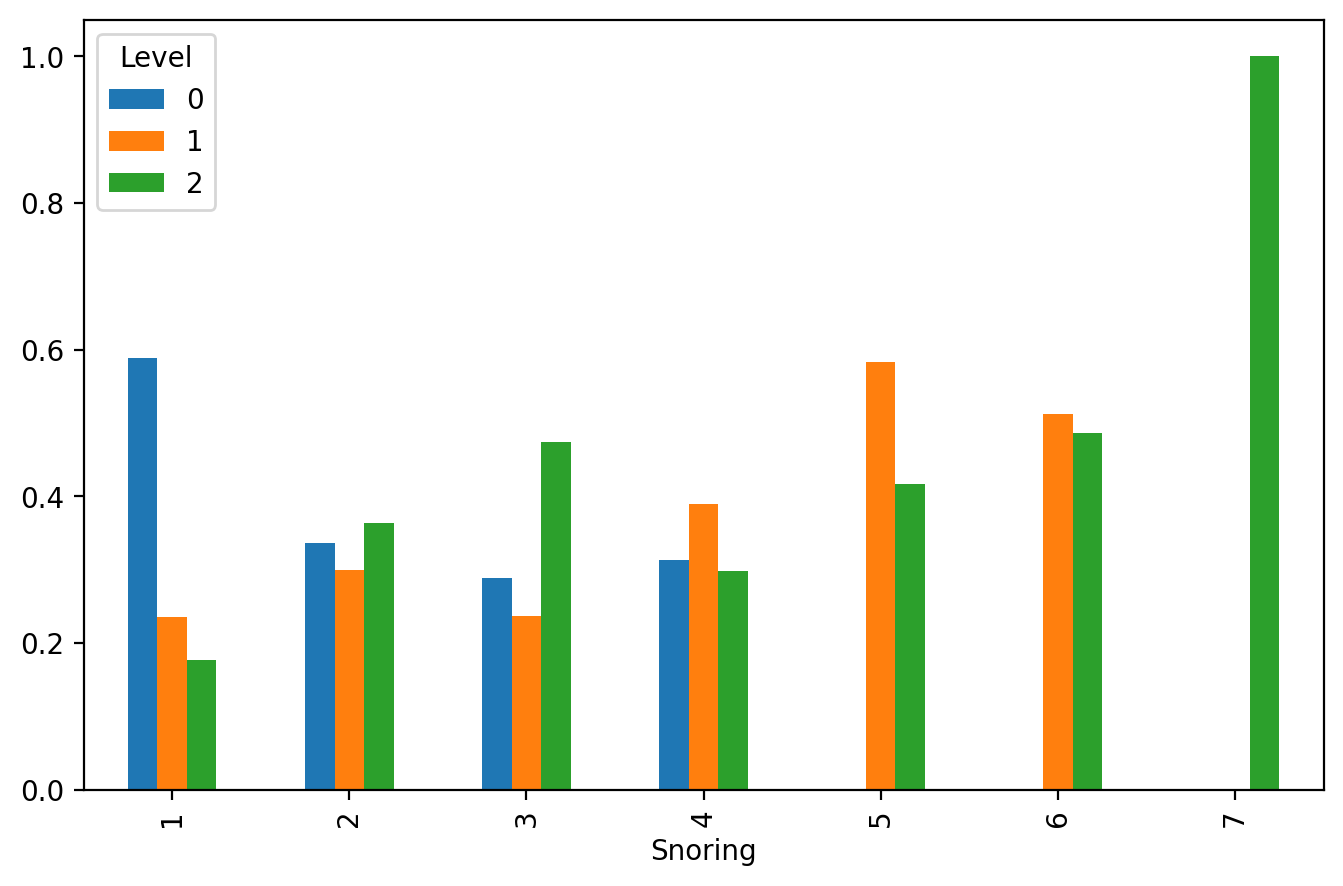

In [34]:
plot('Snoring')

### CORRELATION

In [35]:
#Finding Correlation
cn=df.corr()
cn

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


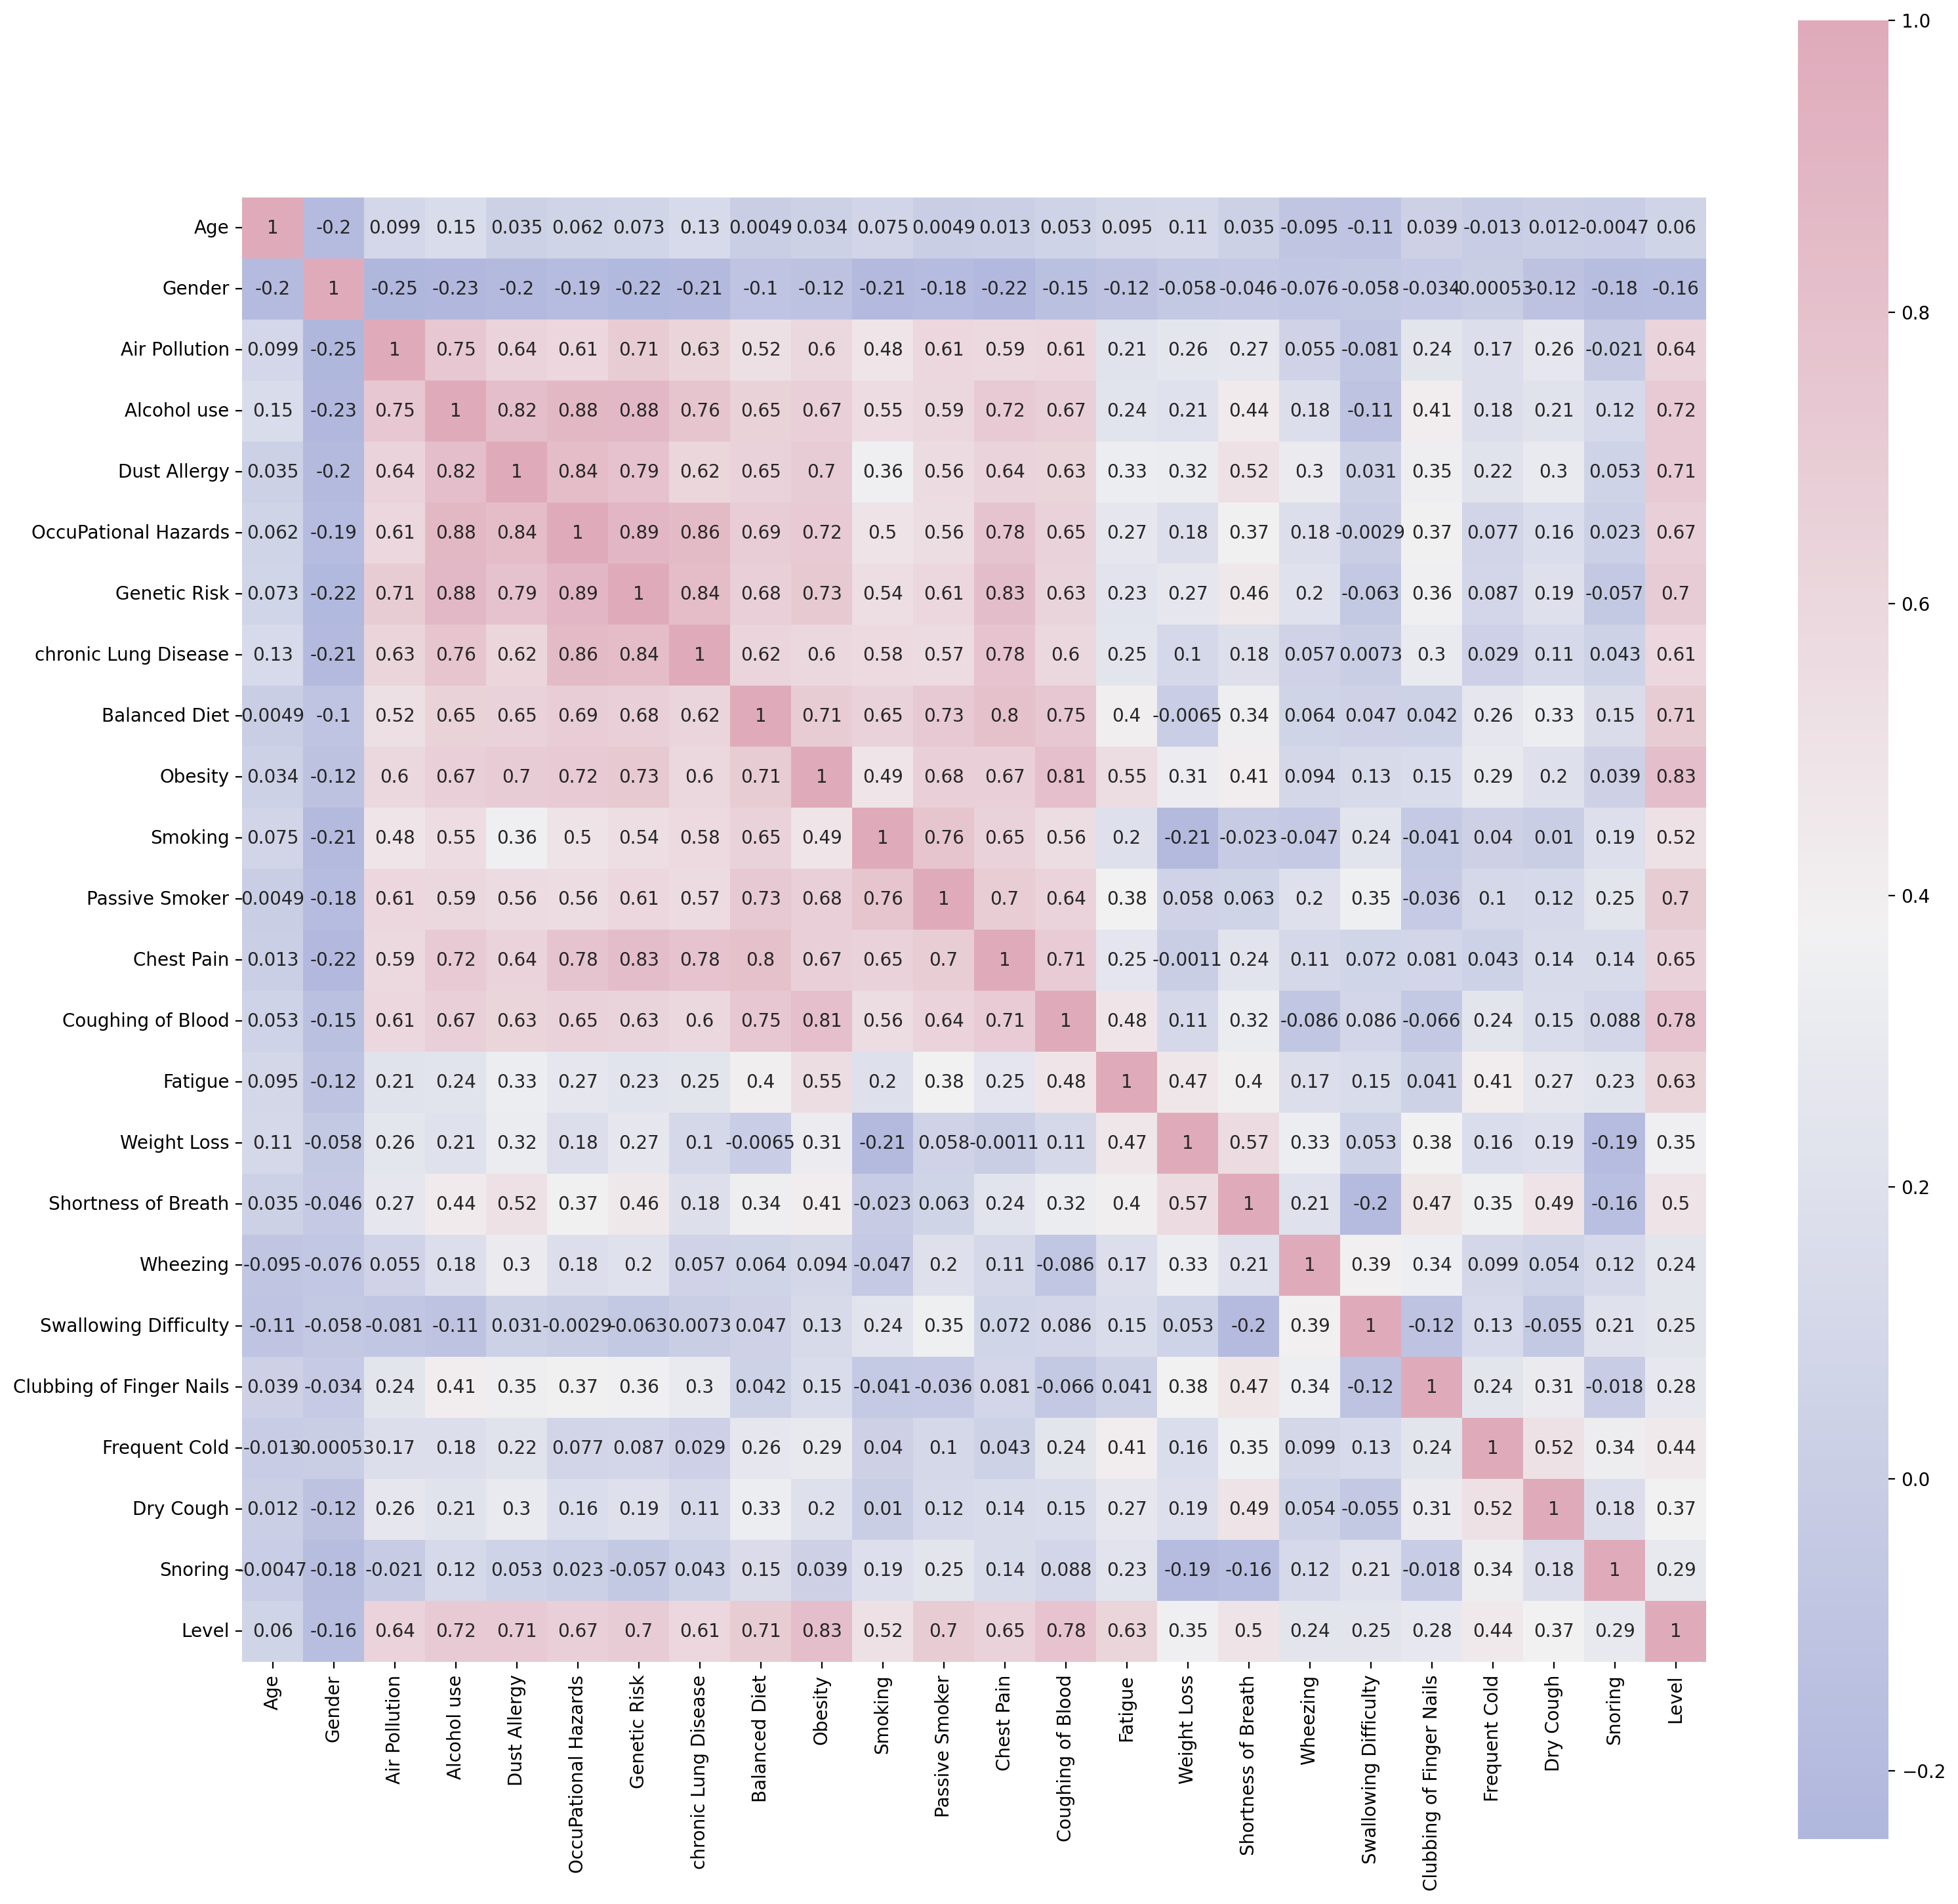

In [36]:
#checking the correlation  of the dataset  to  see  the  features  that  are  highly  correlated  
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

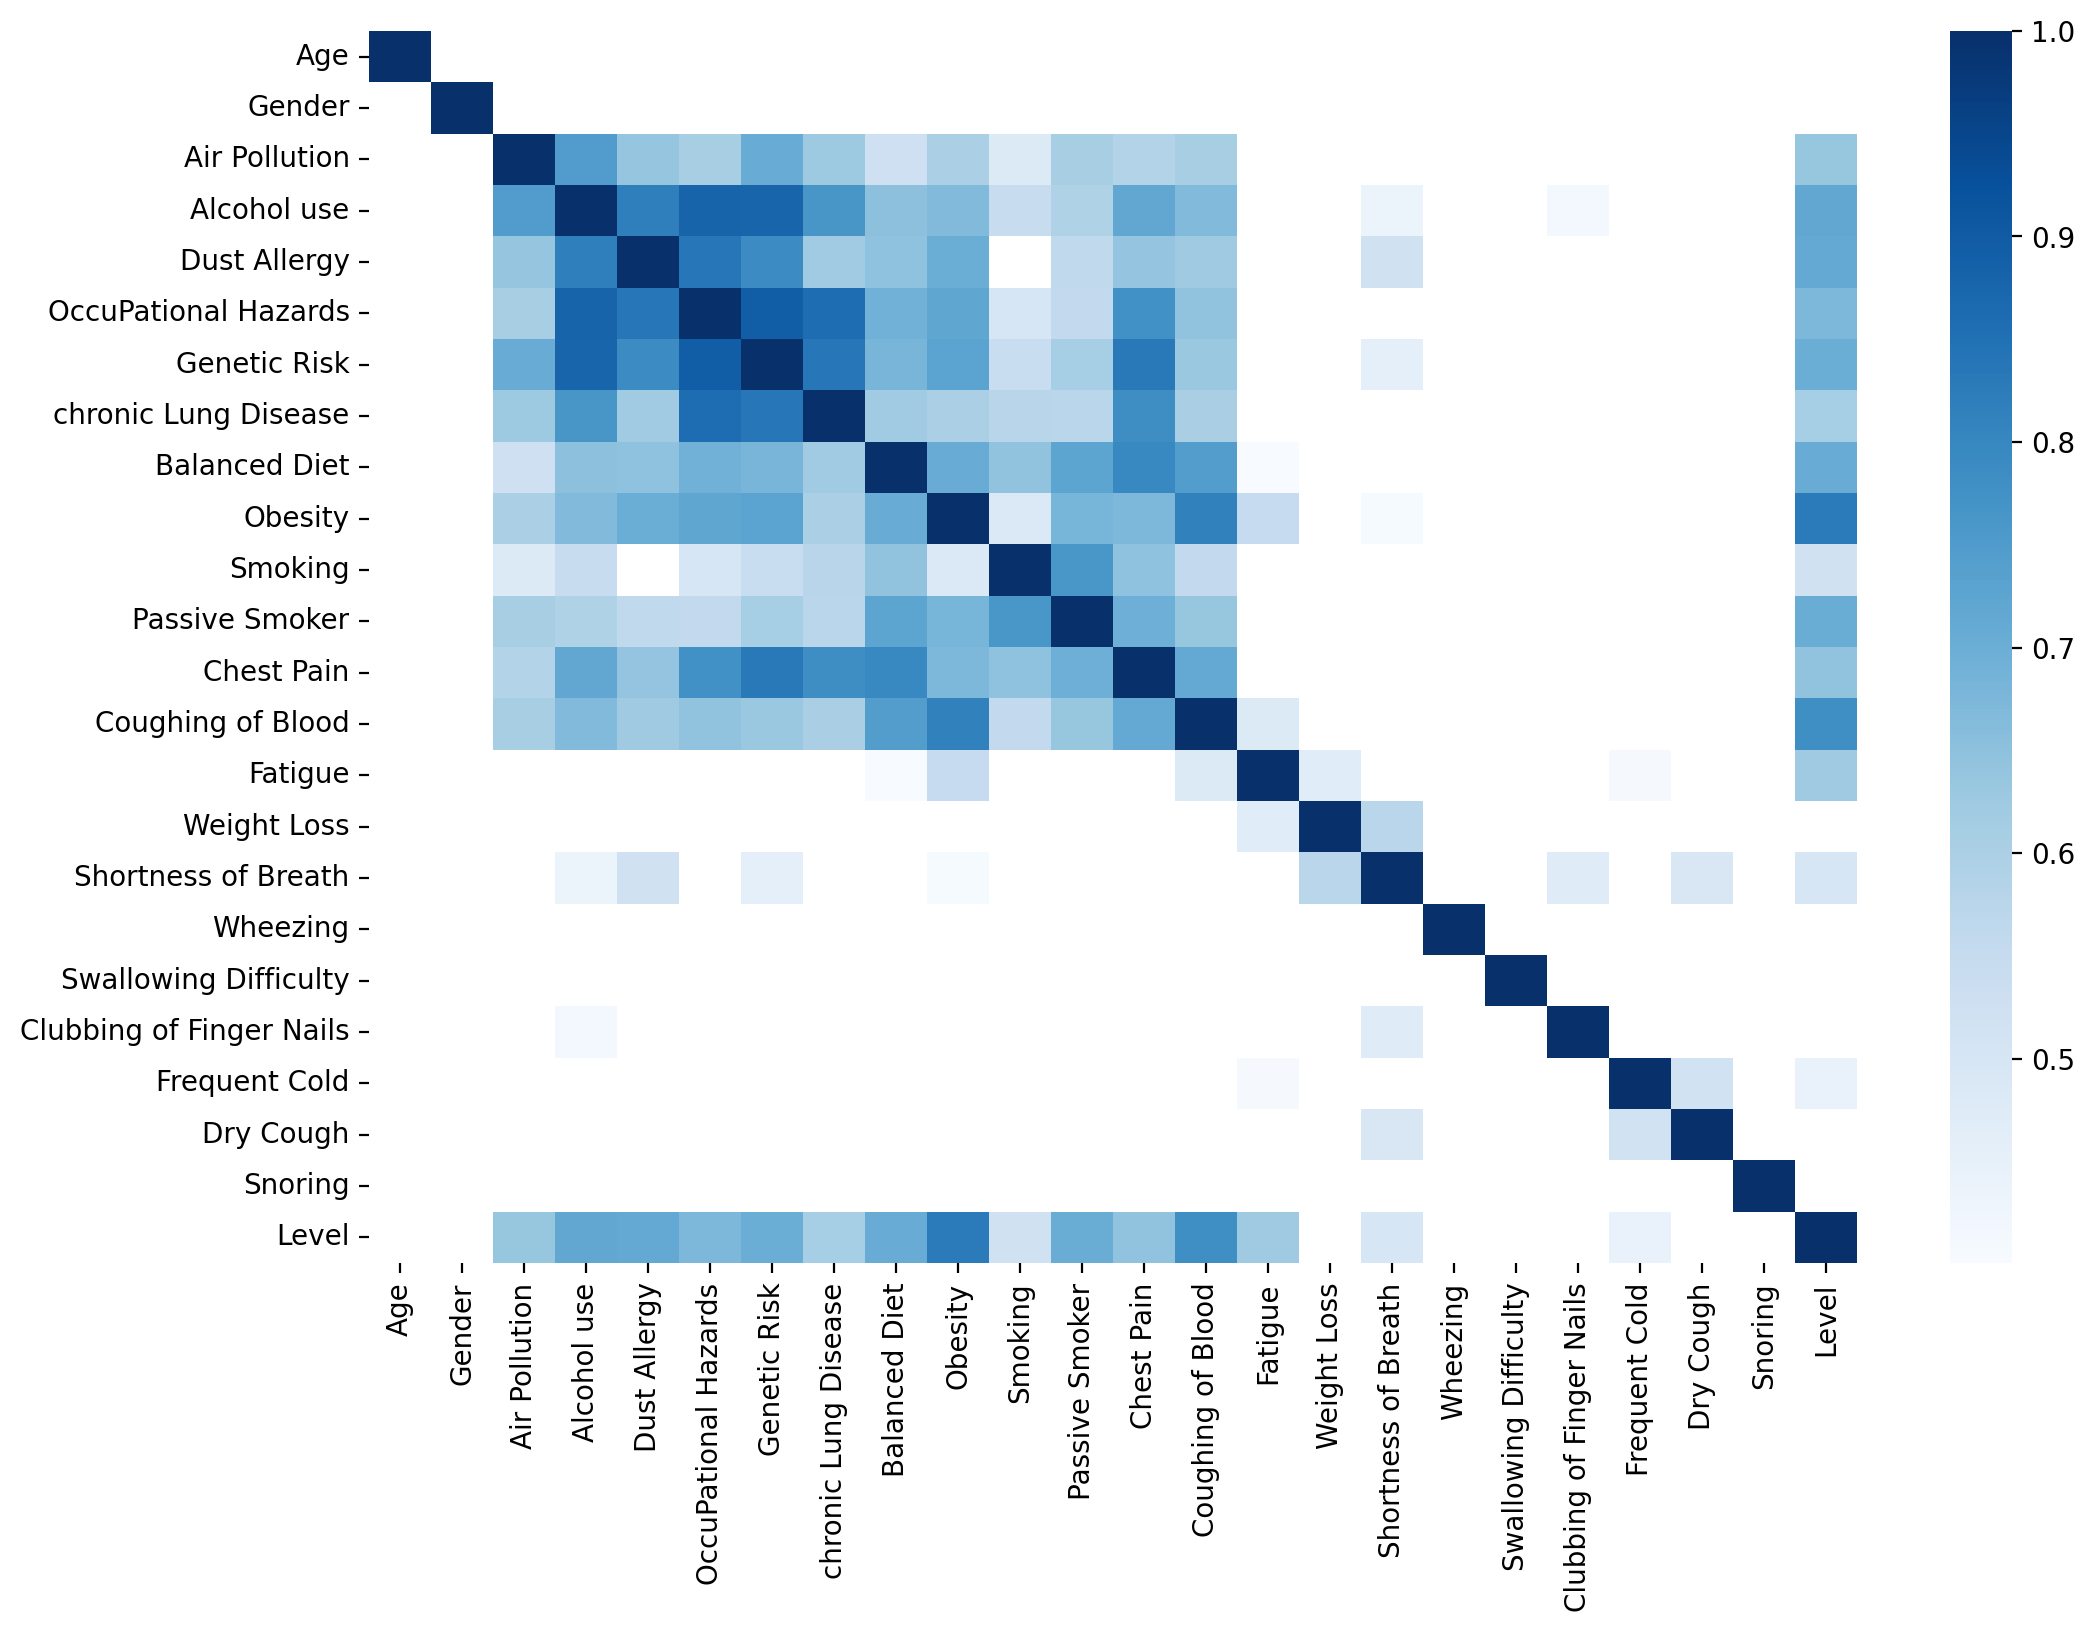

In [37]:
# Filter correlation values greater than or equal to 0.40
kot = cn[cn>=.40]
# Create a heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# • MODEL BUILDING 
Model building involved phases such as data split -» Data Normalization -> Feature selection -> classification -> Model Evaluation -> hyperparameter tuning

### Data Splitting 
Now lets divide our datasets into train and test data. 20% of the dataset will be use for testing and 80% for training

In [38]:
# Train-Test Split
#20% of the dataset will be use for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (800, 23)
Y train shape:  (800,)


Test Shape

X test shape:  (200, 23)
Y test shape:  (200,)




### Data Normalization
Standardization should be fit on the training dataset only to prevent test dataset information from leaking into the training process. Then, the test dataset is standardized using the fitting results from the training dataset


#### Application of Scaler
Rescaling the features into 0 and 1 using MIN-MAX scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

#displaying training dataset after scaling
X_train


array([[0.66101695, 1.        , 0.42857143, ..., 0.83333333, 1.        ,
        0.16666667],
       [0.6440678 , 0.        , 0.28571429, ..., 0.16666667, 0.33333333,
        0.33333333],
       [0.06779661, 1.        , 0.71428571, ..., 0.5       , 0.16666667,
        0.33333333],
       ...,
       [0.13559322, 0.        , 0.71428571, ..., 0.33333333, 0.5       ,
        0.16666667],
       [0.38983051, 0.        , 0.85714286, ..., 0.83333333, 1.        ,
        0.66666667],
       [0.37288136, 0.        , 0.71428571, ..., 1.        , 0.83333333,
        0.16666667]])

In [40]:
#displayiug test dataset after scaling
X_test


array([[0.38983051, 1.        , 0.85714286, ..., 0.83333333, 1.        ,
        0.66666667],
       [0.57627119, 1.        , 0.71428571, ..., 0.33333333, 0.5       ,
        0.16666667],
       [0.15254237, 0.        , 0.28571429, ..., 0.83333333, 0.66666667,
        0.5       ],
       ...,
       [0.20338983, 1.        , 0.85714286, ..., 0.16666667, 0.33333333,
        0.        ],
       [0.08474576, 0.        , 0.71428571, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.52542373, 1.        , 0.        , ..., 0.16666667, 0.33333333,
        0.        ]])

## 	Classification
Classification which is the way the model learns the patterns and relationships between input variables and the output labels, allowing it to make prediction on new, unseen data.

In this research,three classification techniques is employed:
Logistic regression, Gaussian Naive Bayes and Multinomial Naive Bayes.

Overall Model performance Evaluation is done using cross validation.  

1.	Cross Validation

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.
During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.
K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.



# Logistic Regression

In [41]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [42]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 1], dtype=int64)

In [43]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        67
           1       0.92      1.00      0.96        58
           2       1.00      1.00      1.00        75

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



This means that the overall accuracy of the model in correctly predicting the classes of the samples is 97%.

The overall precision of the model is 0.98, indicating that, on average, 98% of the positive predictions made by the model are correct across all classes.

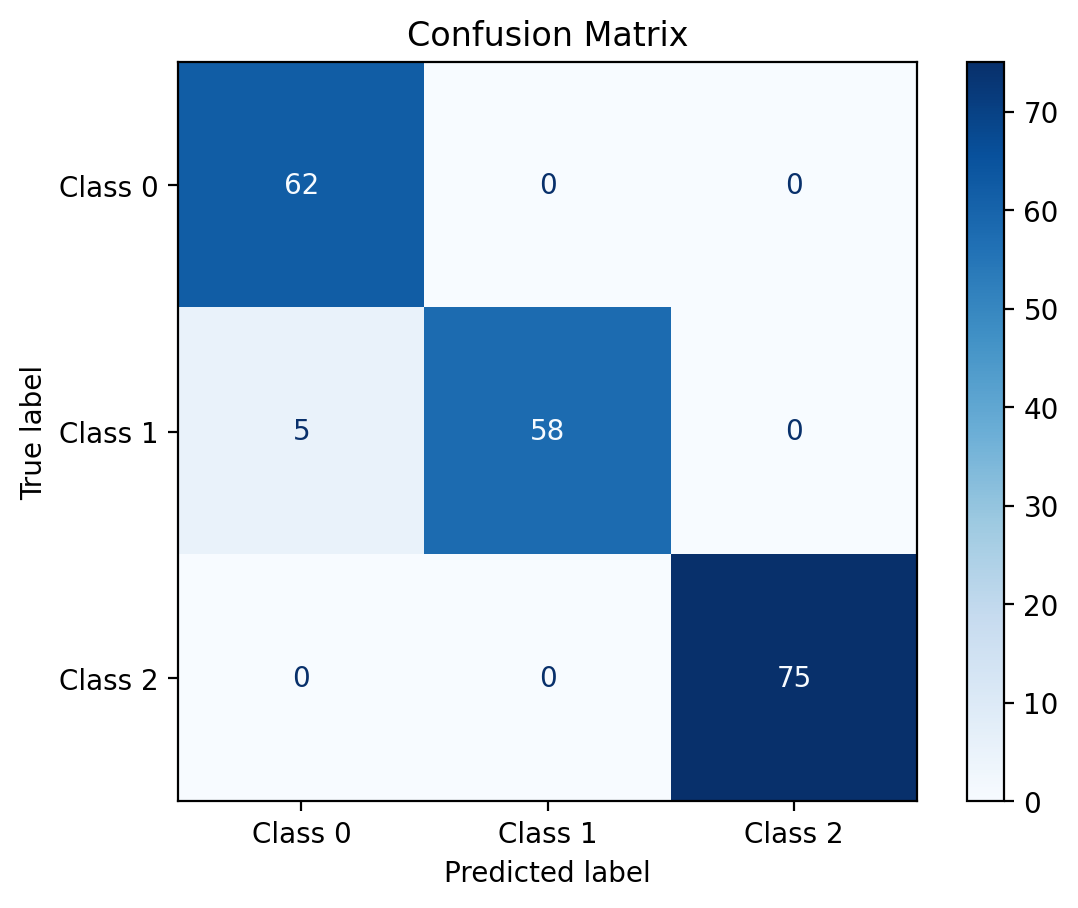

In [44]:
# display the confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_lr_pred and y_test are your predicted and true labels respectively
con_lr = confusion_matrix(y_lr_pred, y_test)

# For a binary classification problem, unpack the confusion matrix
if con_lr.shape == (2, 2):
    TN, FP, FN, TP = con_lr.ravel() 
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
else:
    # For multiclass classification, adjust accordingly
    # For example, if you have 3 classes:
    class_names = ['Class 0', 'Class 1', 'Class 2']
    disp = ConfusionMatrixDisplay(confusion_matrix=con_lr, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.show()



Class 0(LOW): 65 true positives, 2 false positives (predicted as Class 1), and 1 false positive (predicted as Class 2).

Class 1(MEDUIM): 1 false negative (actual Class 1 predicted as Class 0), 56 true positives, and it appears there are no instances misclassified as Class 2.

Class 2(HIGH): 1 false negative (actual Class 2 predicted as Class 0), no instances misclassified as Class 1, and 74 true positives.

The diagonal cells (65, 56, 74) represent the number of correct predictions for each class. The off-diagonal cells show the number of incorrect predictions, where the row represents the true class and the column represents the predicted class. Overall, the model seems to perform quite well, with few misclassifications.

#### ROC and AUC of Logistic Regression 

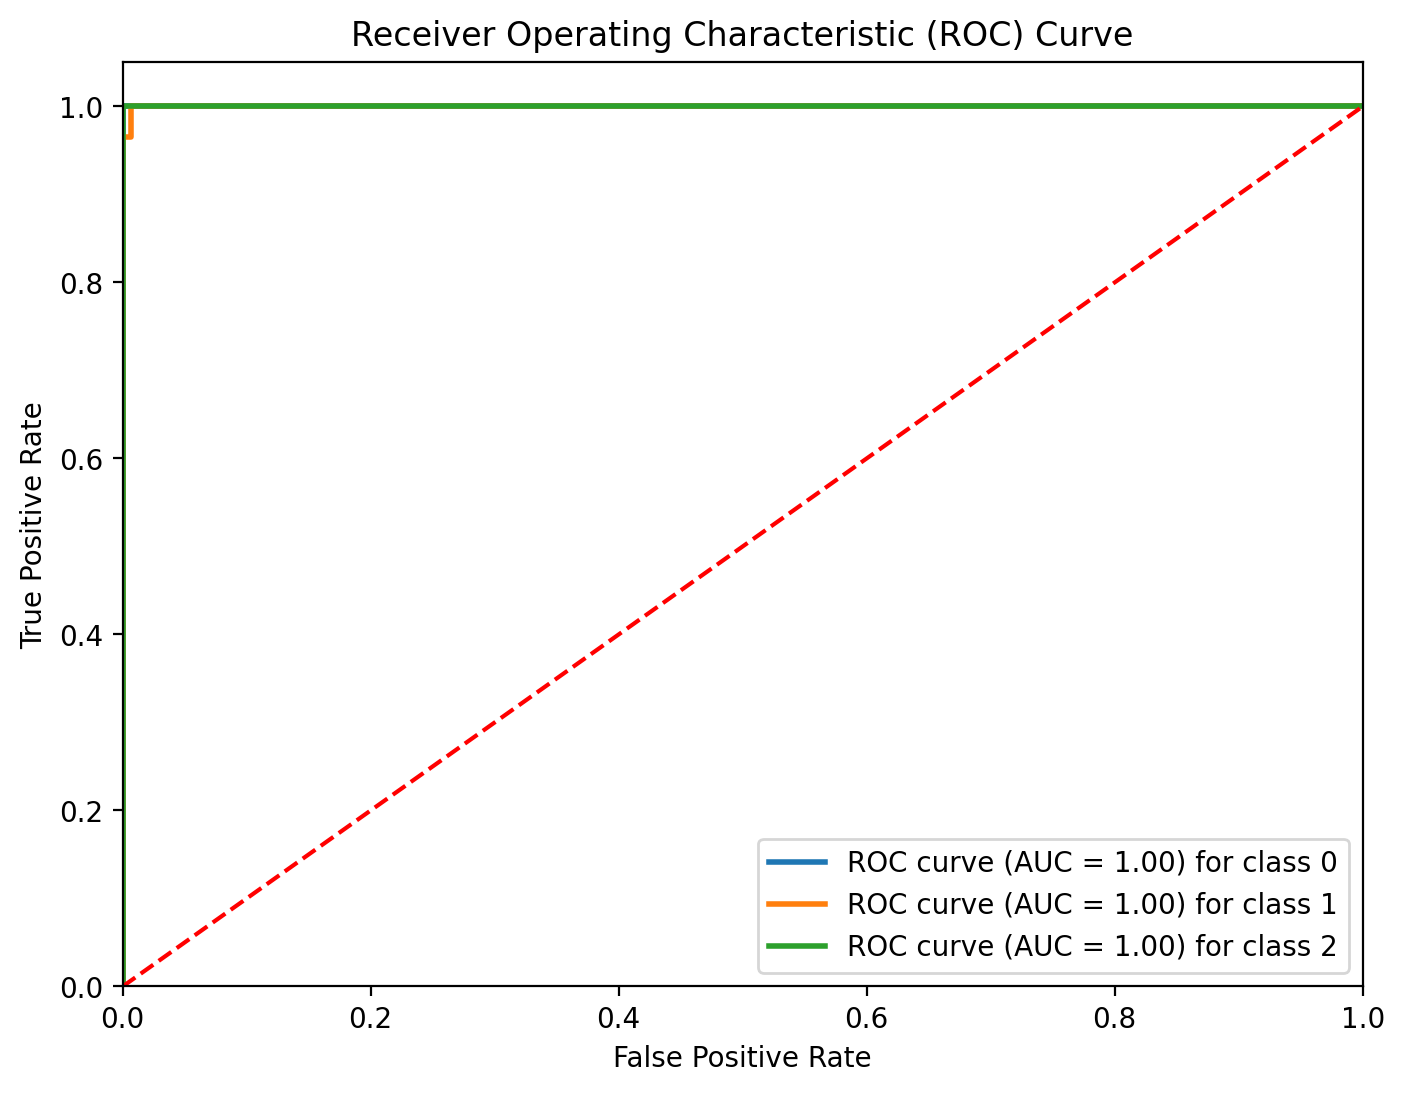

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities for each class
y_lr_probs = lr_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(lr_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == lr_model.classes_[i], y_lr_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(lr_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[i], lr_model.classes_[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Gaussian Naive Bayes

In [85]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [86]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 1], dtype=int64)

In [57]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.79      0.79      0.79        58
           2       0.84      0.92      0.88        75

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



This means that the overall accuracy of the model in correctly predicting the classes of the samples is 88%.

The overall precision of the model is 0.88, indicating that, on average, 88% of the positive predictions made by the model are correct across all classes.

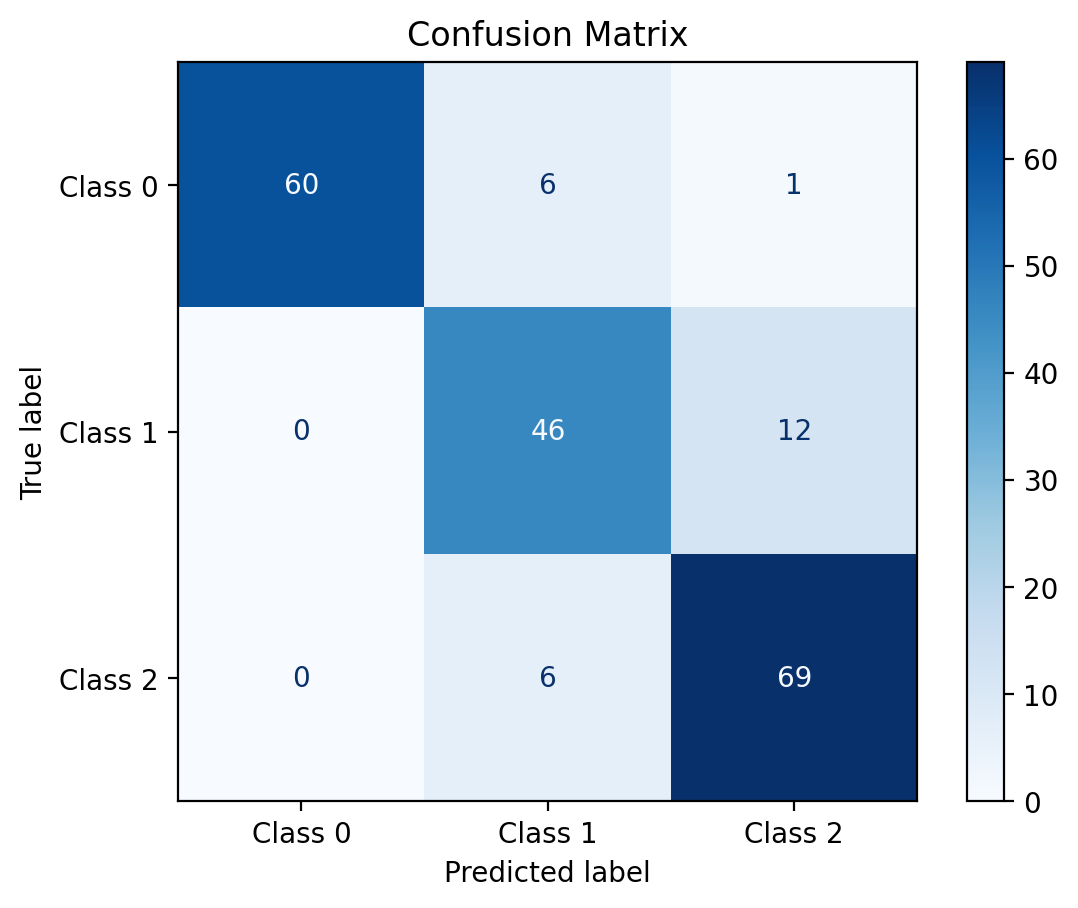

In [58]:
# display the confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_knn_pred and y_test are your predicted and true labels respectively
con_gnb = confusion_matrix(y_test, y_gnb_pred)

# For a binary classification problem, unpack the confusion matrix
if con_gnb.shape == (2, 2):
    TN, FP, FN, TP = con_gnb.ravel() 
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
else:
    # For multiclass classification, adjust accordingly
    # For example, if you have 3 classes:
    class_names = ['Class 0', 'Class 1', 'Class 2']
    disp = ConfusionMatrixDisplay(confusion_matrix=con_gnb, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

#### ROC and AUC of Gaussian Naive Bayes 

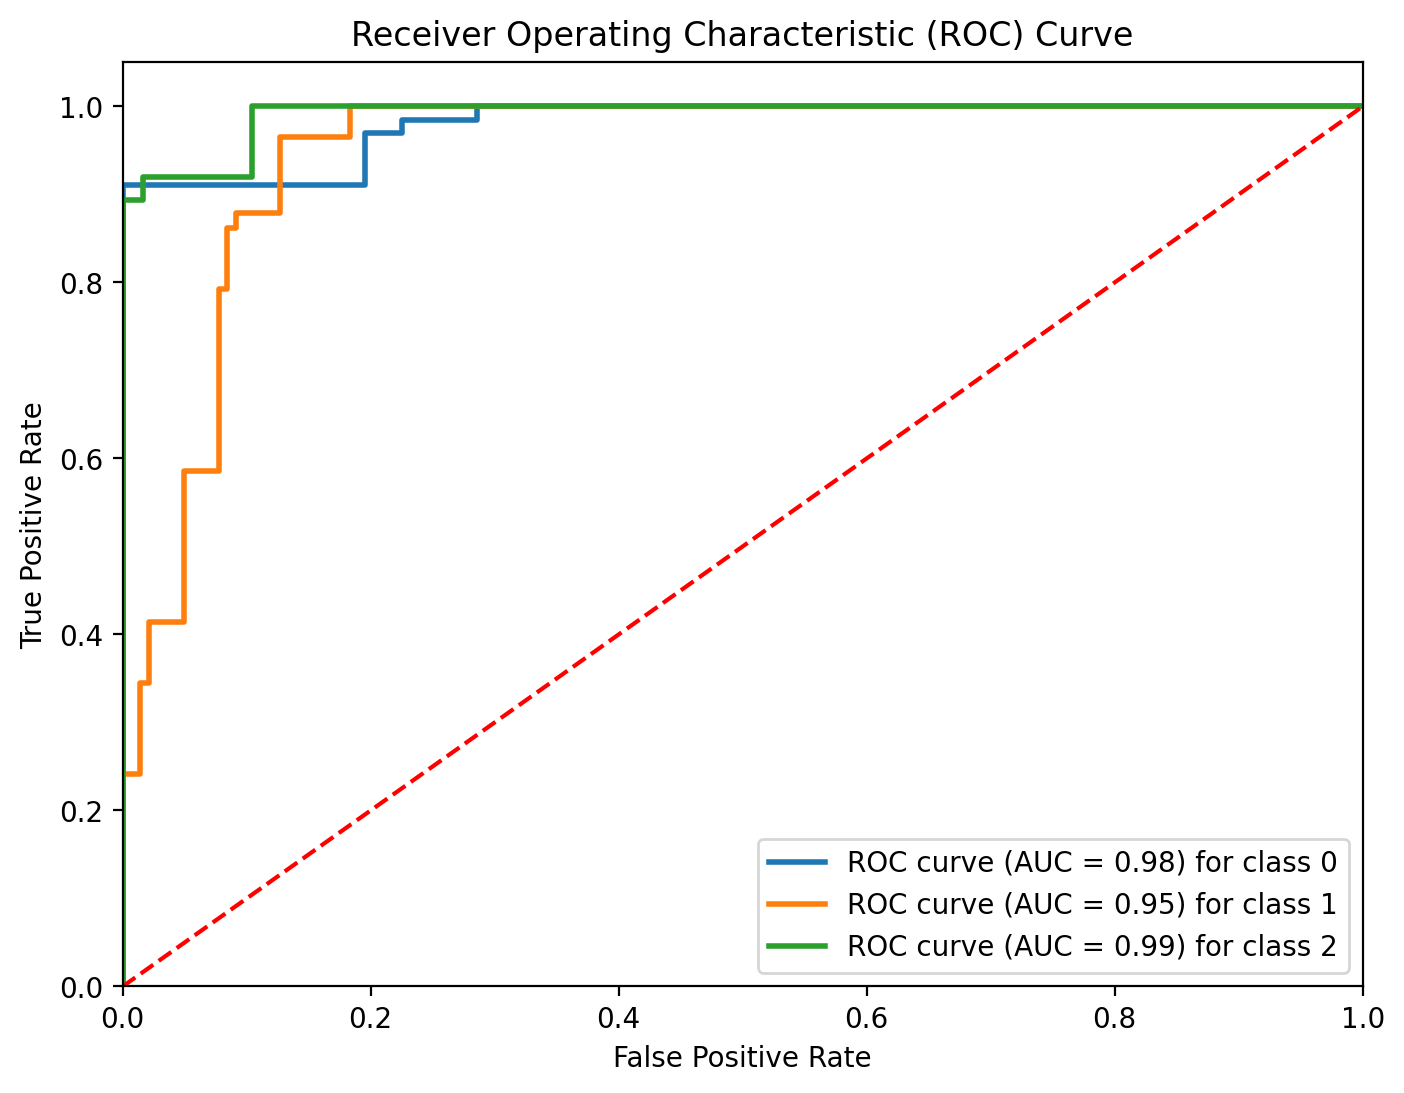

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities for each class
y_gnb_probs = gnb_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(gnb_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == gnb_model.classes_[i], y_gnb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(gnb_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[i], gnb_model.classes_[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Multinomial Naive Bayes

In [59]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [60]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0,
       1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 0], dtype=int64)

In [61]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        67
           1       0.63      0.67      0.65        58
           2       0.72      0.81      0.76        75

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



This means that the overall accuracy of the model in correctly predicting the classes of the samples is 70%.

The overall precision of the model is 0.71, indicating that, on average, 71% of the positive predictions made by the model are correct across all classes.

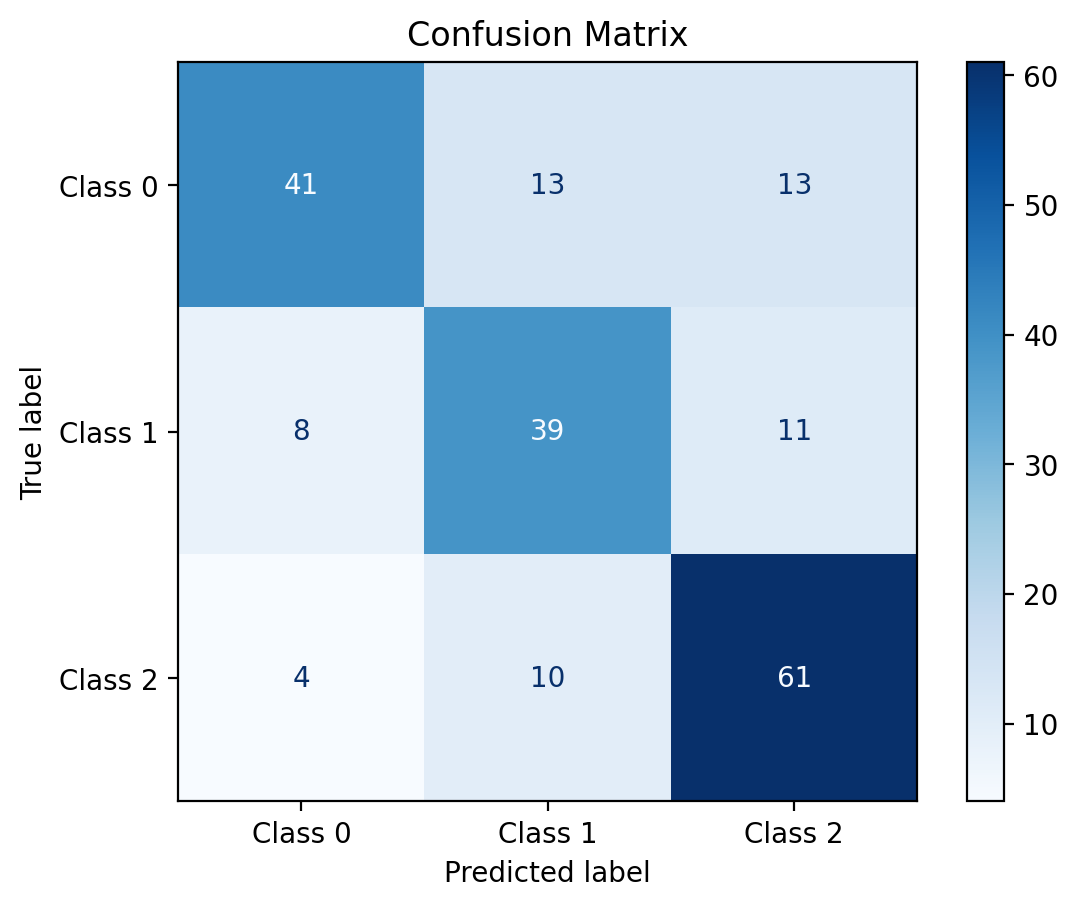

In [62]:
# display the confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_mnb_pred and y_test are your predicted and true labels respectively
con_mnb = confusion_matrix(y_test, y_mnb_pred)

# For a binary classification problem, unpack the confusion matrix
if con_mnb.shape == (2, 2):
    TN, FP, FN, TP = con_mnb.ravel() 
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
else:
    # For multiclass classification, adjust accordingly
    # For example, if you have 3 classes:
    class_names = ['Class 0', 'Class 1', 'Class 2']
    disp = ConfusionMatrixDisplay(confusion_matrix=con_mnb, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix')
    plt.show()

#### ROC and AUC of Multinomial Naive Bayes 

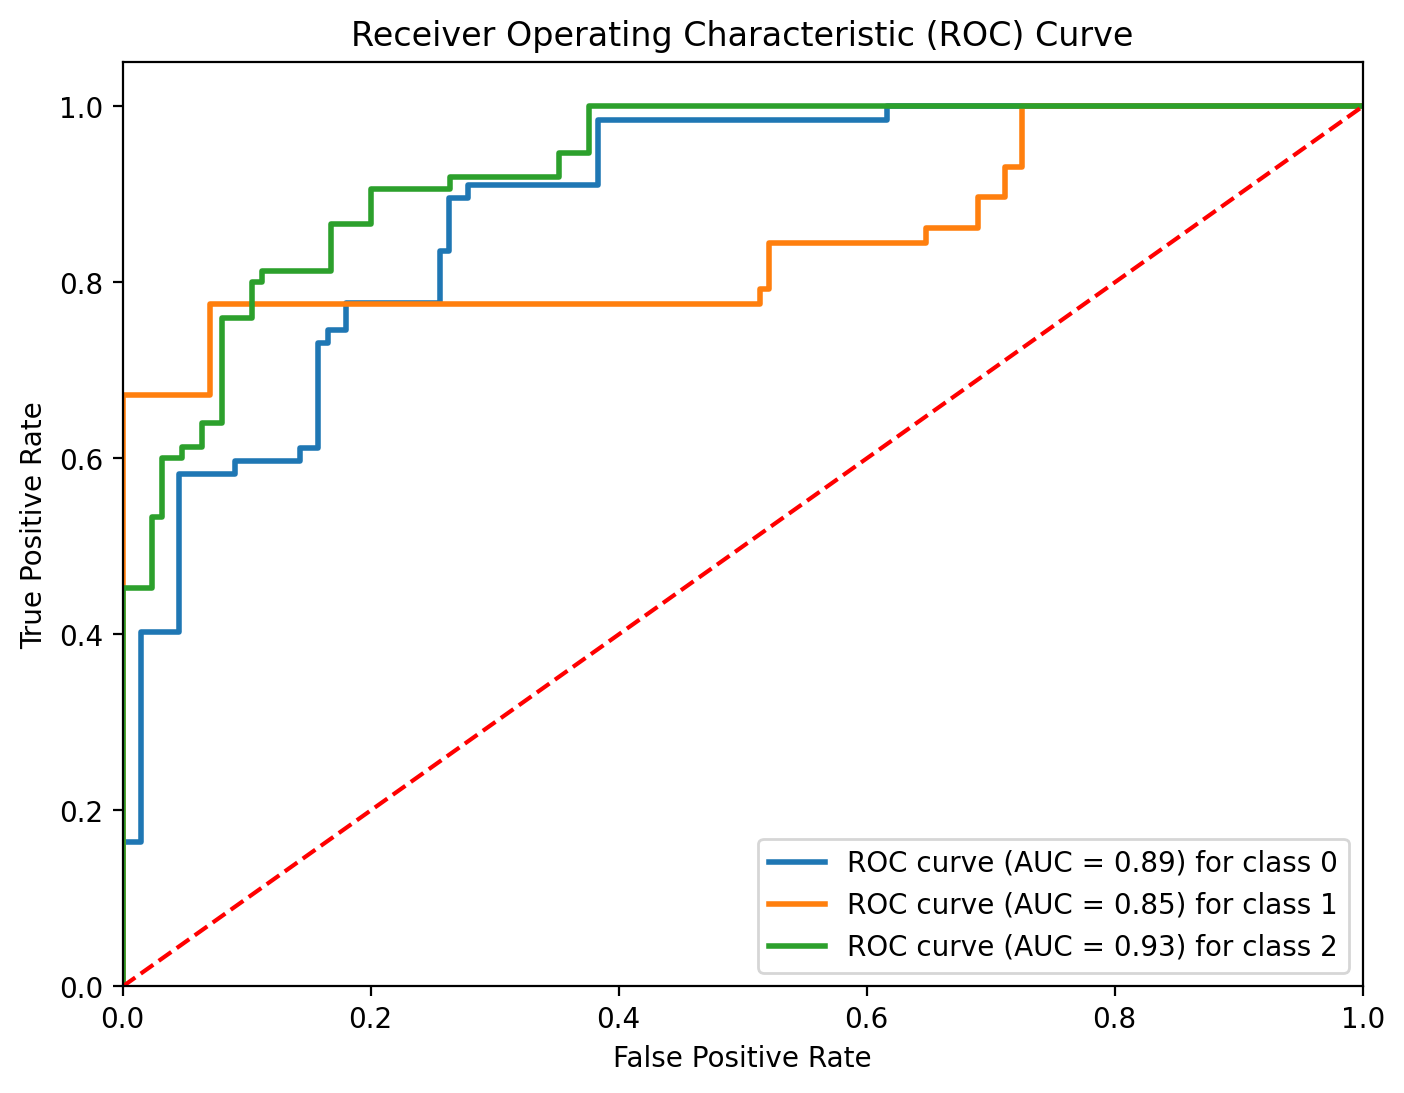

In [84]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
log_probabilities = mnb_model.predict_log_proba(X_test)
probabilities = np.exp(log_probabilities)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(mnb_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == mnb_model.classes_[i]).astype(int), probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(mnb_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc[i], mnb_model.classes_[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Hyperparameter Tuning


#### Hyperparameter Tuning for Logistic Regression 

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy with Best Model: 1.0
Classification Report with Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        75

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



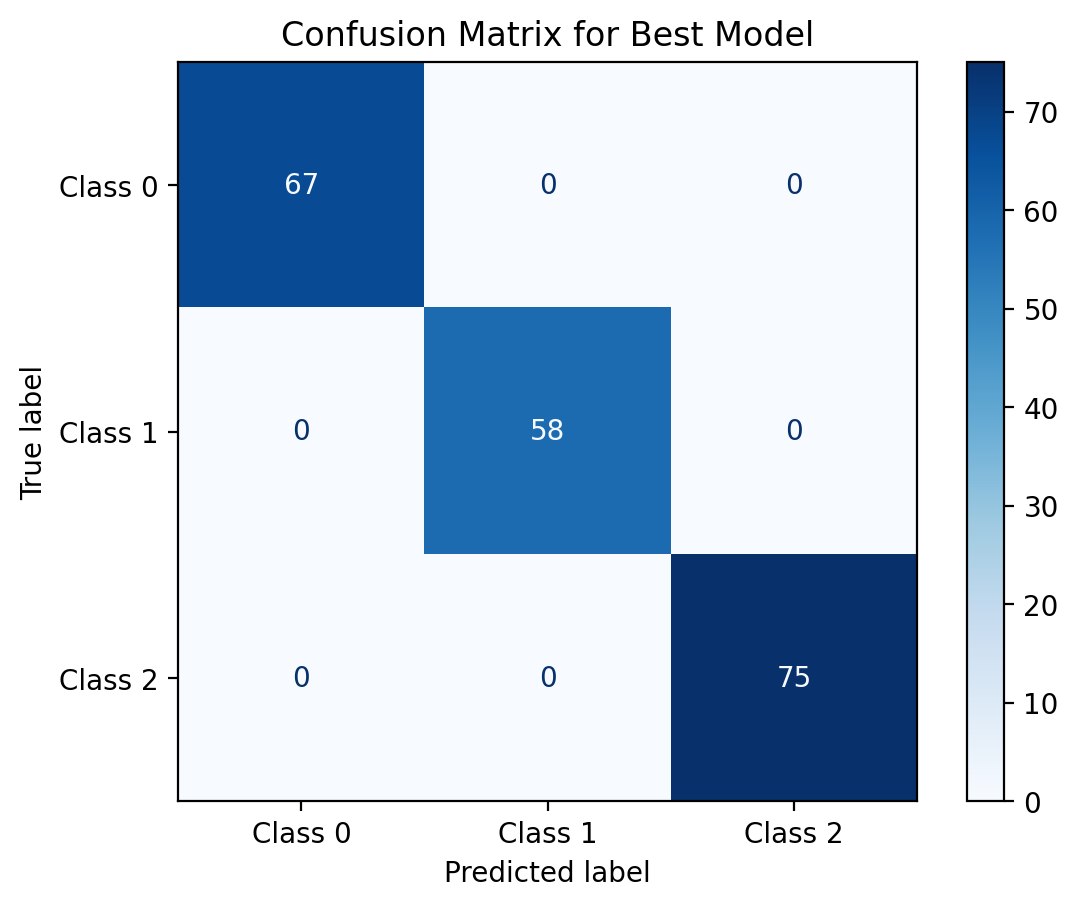

In [87]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear']  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

# Predict using the best model
y_lr_pred_best = best_lr_model.predict(X_test)

# Model accuracy using the best model
accuracy_best = accuracy_score(y_test, y_lr_pred_best)
print("Accuracy with Best Model:", accuracy_best)

# Classification report with the best model
lr_cr_best = classification_report(y_test, y_lr_pred_best)
print("Classification Report with Best Model:")
print(lr_cr_best)

# Confusion matrix with the best model
con_lr_best = confusion_matrix(y_lr_pred_best, y_test)
if con_lr_best.shape == (2, 2):
    TN, FP, FN, TP = con_lr_best.ravel()
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
else:
    # For multiclass classification, adjust accordingly
    class_names = ['Class 0', 'Class 1', 'Class 2']
    disp = ConfusionMatrixDisplay(confusion_matrix=con_lr_best, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set_title('Confusion Matrix for Best Model')
    plt.show()


#### Hyperparameter Tuning for Gaussian Naive Bayes 

Hyperparameter tuning for Gaussian Naive Bayes is not typically performed as it has very few hyperparameters to tune. However, we use techniques like cross-validation for parameter estimation.

In [88]:
from sklearn.model_selection import cross_val_score

# Define the range of hyperparameters to test
# For Gaussian Naive Bayes, there are no hyperparameters to tune explicitly

# Perform cross-validation to estimate model performance
gnb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", gnb_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", gnb_scores.mean())
print("Standard Deviation of Accuracy:", gnb_scores.std())


Cross-validation scores: [0.90625 0.9125  0.85    0.8875  0.925  ]
Mean Accuracy: 0.89625
Standard Deviation of Accuracy: 0.026100766272276393


#### Hyperparameter Tuning for Multinomial Naive Bayes 

In [90]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter alpha
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5)

# Perform the grid search on your training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new model with the best parameters
best_mnb_model = MultinomialNB(**best_params)
best_mnb_model.fit(X_train, y_train)

# Predict using the tuned model
y_best_mnb_pred = best_mnb_model.predict(X_test)

# Evaluate the tuned model
best_mnb_cr = classification_report(y_test, y_best_mnb_pred)
print("Classification Report for Tuned Model:")
print(best_mnb_cr)


Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        67
           1       0.63      0.67      0.65        58
           2       0.72      0.81      0.76        75

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



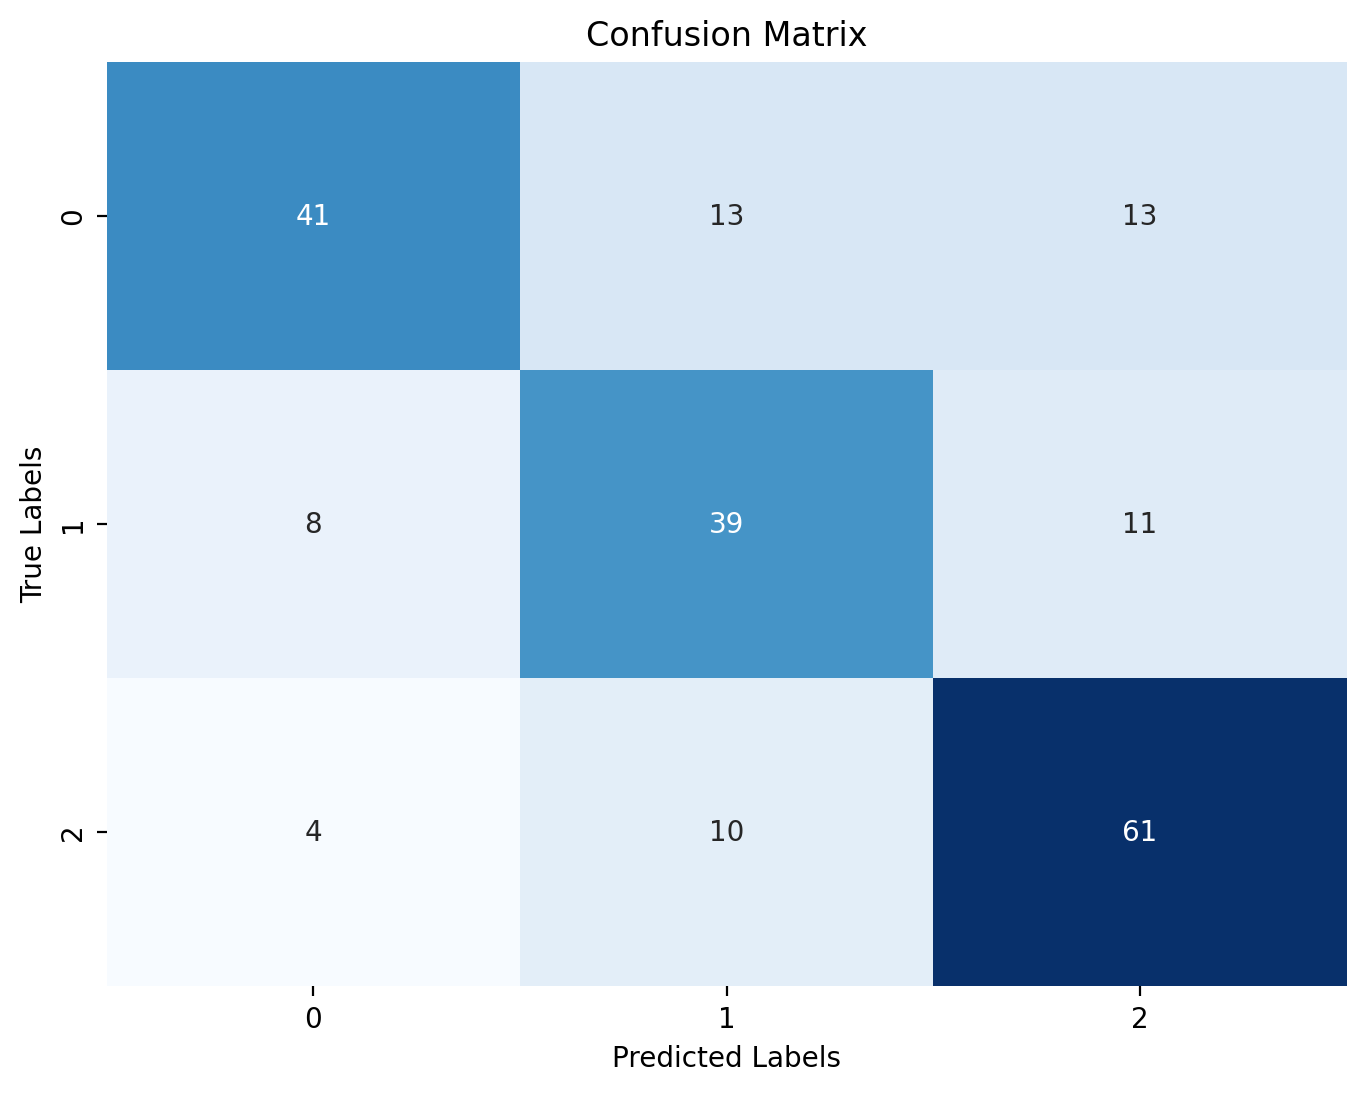

In [91]:
# Calculate the confusion matrix for the tuned model
conf_matrix = confusion_matrix(y_test, y_best_mnb_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Cross Validation 

K-fold cross-validationis perform for Logistic Regression, Gaussian Naive Bayes, and Multinomial Naive Bayes models.

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the models
lr_model = LogisticRegression(random_state=0)
gnb_model = GaussianNB()
mnb_model = MultinomialNB()

# Perform k-fold cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)

# Perform k-fold cross-validation for Gaussian Naive Bayes
gnb_cv_scores = cross_val_score(gnb_model, X_train, y_train, cv=5)

# Perform k-fold cross-validation for Multinomial Naive Bayes
mnb_cv_scores = cross_val_score(mnb_model, X_train, y_train, cv=5)

# Print the average accuracy scores for each model
print("Logistic Regression Average Accuracy:", lr_cv_scores.mean())
print("Gaussian Naive Bayes Average Accuracy:", gnb_cv_scores.mean())
print("Multinomial Naive Bayes Average Accuracy:", mnb_cv_scores.mean())

Logistic Regression Average Accuracy: 0.985
Gaussian Naive Bayes Average Accuracy: 0.89625
Multinomial Naive Bayes Average Accuracy: 0.74


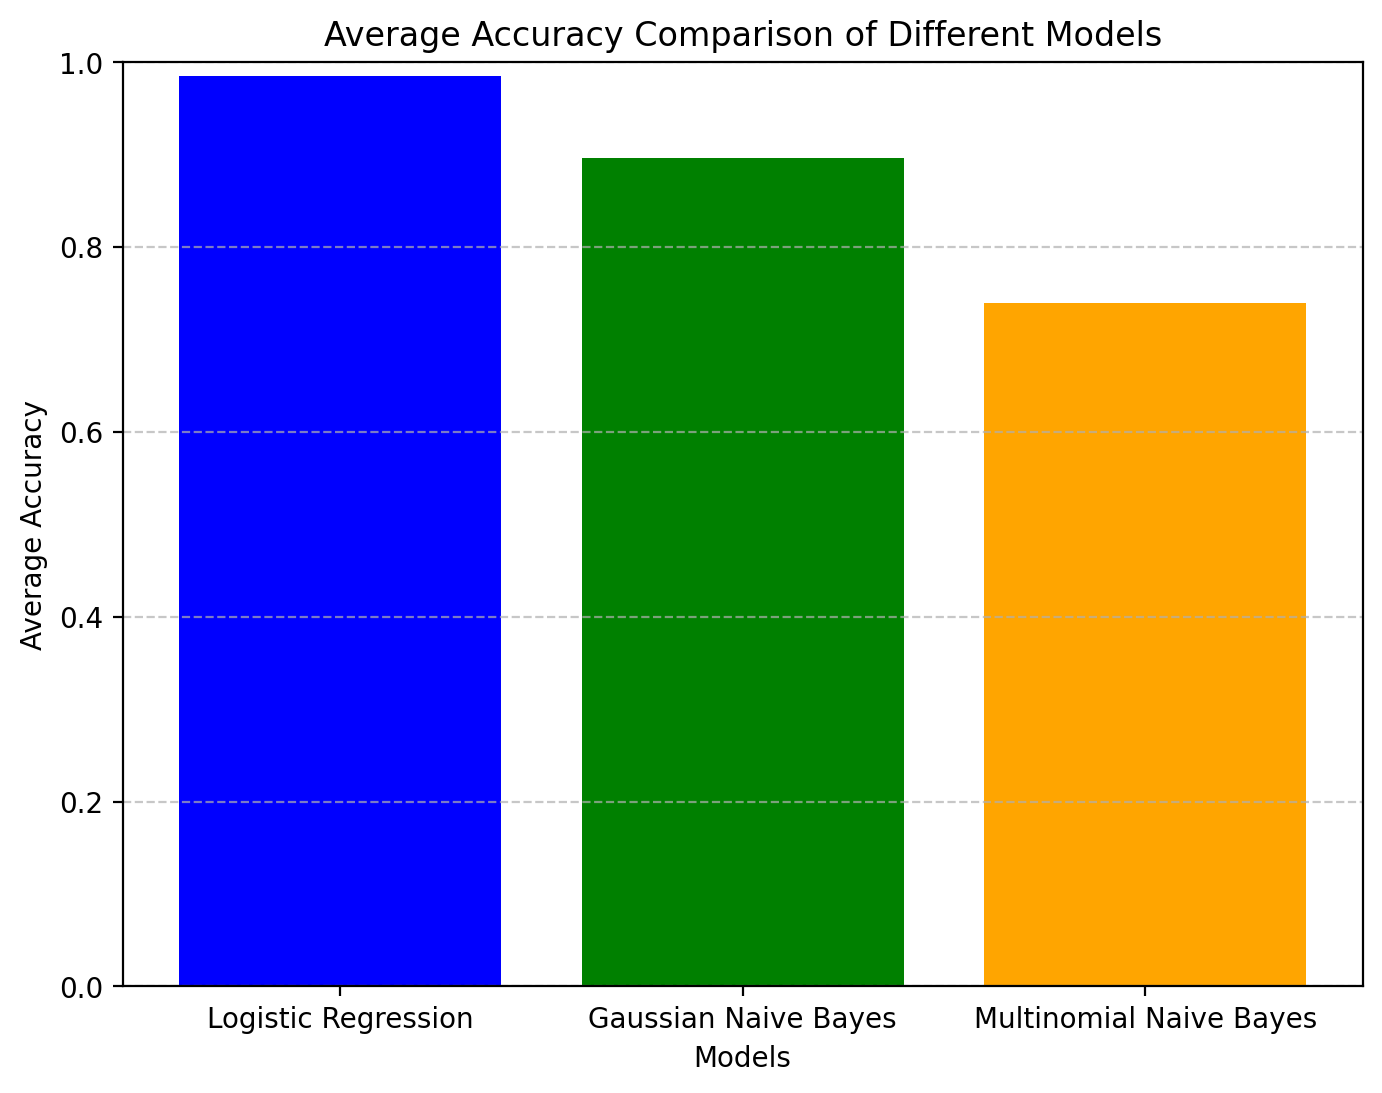

In [93]:
import matplotlib.pyplot as plt

# Define the model names and their average accuracies
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes']
average_accuracies = [lr_cv_scores.mean(), gnb_cv_scores.mean(), mnb_cv_scores.mean()]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(model_names, average_accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
